El siguiente código es una versión extendida del originalv ver Davidson et al. 2017.

    Davidson, T., Warmsley, D., Macy, M., & Weber, I. (2017, May). Automated hate speech detection and the problem of offensive language. In Proceedings of the International AAAI Conference on Web and Social Media (Vol. 11, No. 1, pp. 512-515).



Conectarse al GPU

# GPU use in Colab.

In [ ]:
import tensorflow as tfConectarse al GPU
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!/opt/bin/nvidia-smi

Wed Dec  8 21:25:58 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    57W / 149W |    145MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Montar el GPU en Google Collaboratory

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headles}s -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.27-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive

Montar Drive

In [2]:
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id   = '1e6PTWoc-KLHsY1qsMXZ8HhaRmDvmtoLb',
                                    dest_path = '/content/datos/data.p',
                                    unzip     = False)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pip install vaderSentiment

     |████████████████████████████████| 125 kB 11.8 MB/s 


In [5]:
pip install textstat

     |████████████████████████████████| 101 kB 6.4 MB/s 
     |████████████████████████████████| 2.0 MB 23.8 MB/s 


**Librerías**

In [6]:
import pandas as pd
import numpy as np
import pickle
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk import word_tokenize
from nltk.stem.porter import *
import string
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as VS
from textstat.textstat import *
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
plt.style.available
%matplotlib inline
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
%cd '/content/drive/MyDrive/OffensiveLanguage/DATA_PREPROCES'

/content/drive/MyDrive/OffensiveLanguage/DATA_PREPROCES


# PARTE I


Cargamos los datos preprocesados:

In [22]:
X = pd.read_csv('Matriz1.txt', sep=" ", header=None)

In [24]:
X.shape

(24783, 3420)

In [11]:
y = pd.read_csv('y.txt', sep=" ", header=None)

Dividimos los conjuntos de datos en conjunto de entrenamiento y de prueba.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

Obervamos el tamaño de los data set

In [27]:
print("X_train:", np.shape(X_train),"\nX_test:", np.shape(X_test))

X_train: (22304, 3420) 
X_test: (2479, 3420)


Corremos Modelos

In [ ]:
#Cargando paquetes 
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score

LASSO

In [ ]:
pip install asgl

     |████████████████████████████████| 2.8 MB 6.5 MB/s 
  Created wheel for asgl: filename=asgl-1.0.5-py3-none-any.whl size=16022 sha256=0567486e4d69d83605e722ce8e1f4a5df003a81f538bed39b13afdb826243112
  Stored in directory: /root/.cache/pip/wheels/d6/26/09/40a8a96f5ab2796fd359dd0e473c6067b1a6fafaa1f65612a2
Successfully built asgl
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
alpha = 0.1
sparse_lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=10000)
sparse_lasso.fit(X_train, y_train)

Lasso(alpha=0.1, fit_intercept=False, max_iter=10000)

In [ ]:
y_pred = sparse_lasso.predict(X_test)

In [ ]:
print(np.shape(y_pred),type(y_pred))
print(np.shape(y_test),type(y_test))
print(np.shape(y_test.values),type(y_test.values))
print(np.max(y_pred), np.min(y_pred))
print(y_test.values)
#report = classification_report(y_test.values, y_pred)
#print(report)

(2479,) <class 'numpy.ndarray'>
(2479,) <class 'pandas.core.series.Series'>
(2479,) <class 'numpy.ndarray'>
2.471809002692292 0.0
[1 1 2 ... 1 2 1]


**Función para el histograma y la matriz de confusión**

In [ ]:
def graficas(report, y_test, y_aux, fig_title, fig_save):
  print(report)
  plt.style.available
  plt.style.use('dark_background')
  #plt.style.use('seaborn-dark-palette')
  # creating a confusion matrix
  from sklearn.metrics import confusion_matrix
  confusion_matrix = confusion_matrix(y_test, y_aux)
  matrix_proportions = np.zeros((3,3))
  for i in range(0,3):
      matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
  names=['Hate','Offensive','Neither']
  confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)

  # Grafica de la matriz de confusion
  plt.figure(figsize=(7,7), tight_layout = True)
  seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap="BuPu",cbar=False, square=True,fmt='.2f')
  plt.ylabel(r'True categories',fontsize=14)
  plt.xlabel(r'Predicted categories',fontsize=14)
  title = 'Matriz de confusion:'+fig_title 
  plt.title(title)
  plt.tick_params(labelsize=12)
  name = 'mat_'+fig_save
  plt.savefig(name)
  plt.show()
  
  # Histograma 
  plt.style.available
  plt.style.use('seaborn-dark-palette')
  fig, ax = plt.subplots(1, 1,
                          figsize =(10, 7),
                          tight_layout = True)
  ax.hist(y_aux,color='pink')
  title = 'Histograma de clasificación para: '+fig_title 
  plt.title(title)
  names = ['','Hate','','', '','Offensive','','', '', 'Neither']
  ax.set_xticklabels(names)
  ax.set_ylabel('Frecuencia')
  plt.grid()
  name = 'hist_'+fig_save
  plt.savefig(name)
  plt.show()

**Arboles de decision**

Criterio: 'Gini':

In [ ]:
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', random_state=100)
dtree_model = clf.fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
report = classification_report(y_test.values, dtree_predictions)

In [ ]:
print(clf.n_classes_)

3


**Gráficas y reporte**

              precision    recall  f1-score   support

           0       0.31      0.26      0.28       164
           1       0.87      0.89      0.88      1905
           2       0.61      0.58      0.59       410

    accuracy                           0.80      2479
   macro avg       0.60      0.58      0.58      2479
weighted avg       0.79      0.80      0.79      2479



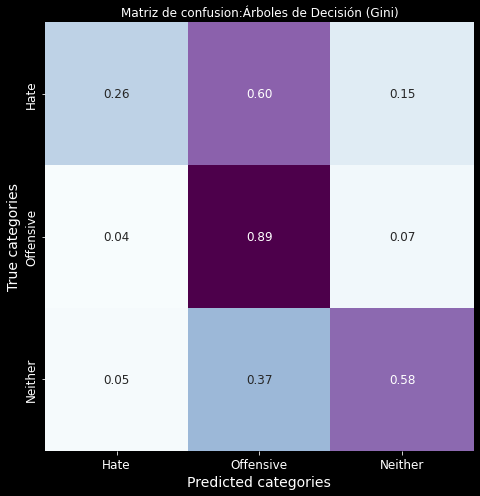

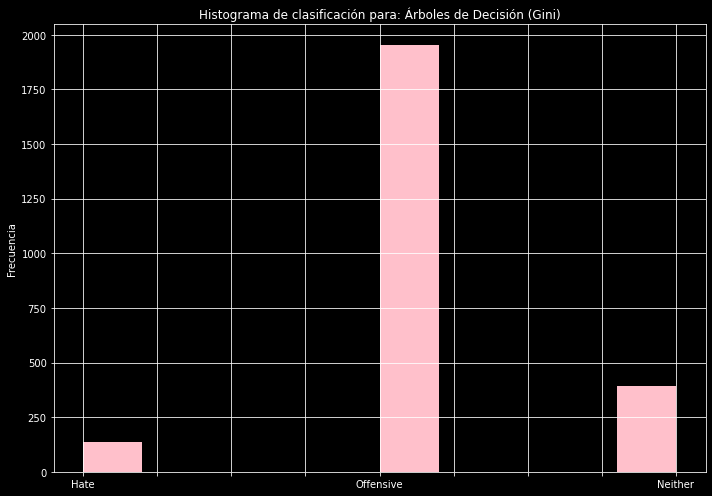

In [ ]:
graficas(report, y_test, dtree_predictions, 'Árboles de Decisión (Gini)', 'dtree_gini.png')

Accuracy:

In [ ]:
dtree1_accuracy = accuracy_score(y_test, dtree_predictions, normalize=True) #0.7991125453812021
print(dtree1_accuracy)

0.7991125453812021


Criterio: 'Entropy'

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=10)
dtree_model = clf.fit(X_train, y_train)
dtree_predictions2 = dtree_model.predict(X_test)
report = classification_report(y_test.values, dtree_predictions2)

Gráficas

              precision    recall  f1-score   support

           0       0.29      0.26      0.27       164
           1       0.86      0.87      0.87      1905
           2       0.58      0.57      0.58       410

    accuracy                           0.78      2479
   macro avg       0.58      0.57      0.57      2479
weighted avg       0.78      0.78      0.78      2479



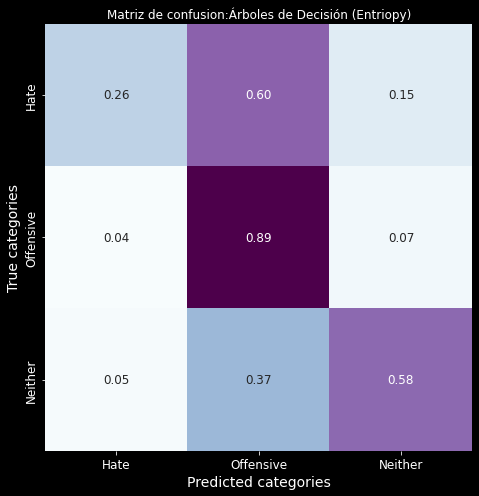

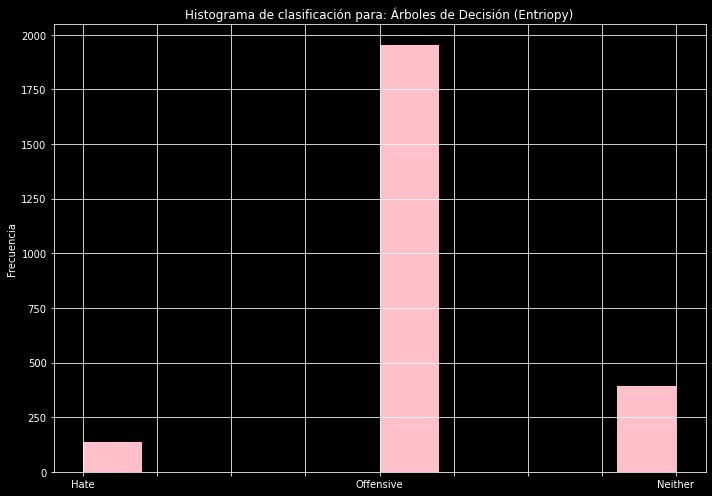

In [ ]:
graficas(report, y_test, dtree_predictions, 'Árboles de Decisión (Entriopy)', 'dtree_entriopy.png')

Accuracy:

In [ ]:
dtree2_accuracy = accuracy_score(y_test, dtree_predictions2, normalize=True) #0.7833803953206938
print(dtree2_accuracy)

0.7833803953206938


REGRESIÓN LOGÍSTICA

Sin penalización:

In [ ]:
logreg1 = LogisticRegression(solver='newton-cg', C=0.05, multi_class='multinomial')
model1 = logreg1.fit(X_train, y_train)
y_preds_2 = model1.predict(X_test)
report = classification_report( y_test, y_preds_2 )

Gráficas y reporte

              precision    recall  f1-score   support

           0       0.28      0.21      0.24       164
           1       0.88      0.91      0.89      1905
           2       0.69      0.66      0.68       410

    accuracy                           0.82      2479
   macro avg       0.62      0.59      0.60      2479
weighted avg       0.81      0.82      0.81      2479



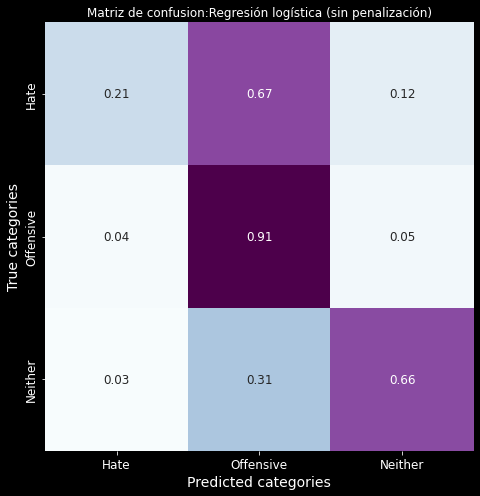

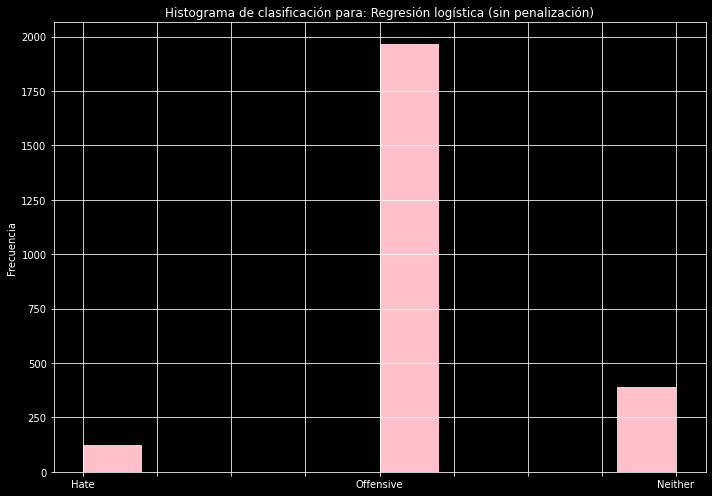

In [ ]:
graficas(report, y_test, y_preds_2, 'Regresión logística (sin penalización)', 'reglog_sinpena.png')

Accuracy:

In [ ]:
relog_sp = accuracy_score(y_test, y_preds_2, normalize=True) #0.8204921339249698´
print(relog_sp)

0.8204921339249698


Con penalización l1:

In [ ]:
logreg2 = LogisticRegression(solver='saga', C=0.05, multi_class='multinomial',penalty='l1')
model2  = logreg2.fit(X_train, y_train)
y_preds_3 = model2.predict(X_test)
report2 = classification_report( y_test, y_preds_3 )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Graficas y Reporte

              precision    recall  f1-score   support

           0       0.49      0.14      0.22       164
           1       0.87      0.95      0.91      1905
           2       0.74      0.64      0.68       410

    accuracy                           0.85      2479
   macro avg       0.70      0.58      0.60      2479
weighted avg       0.82      0.85      0.83      2479



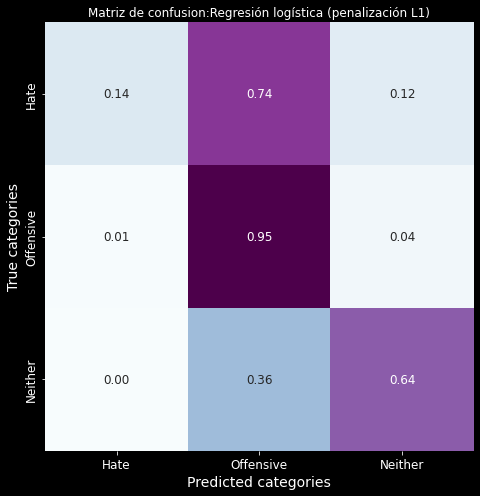

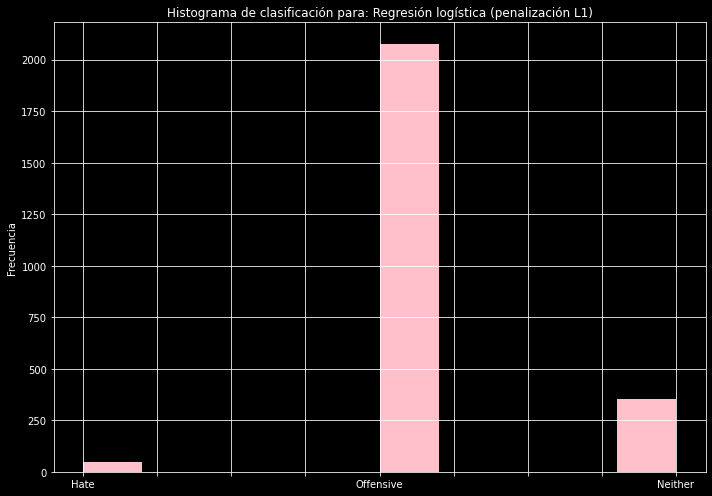

In [ ]:
graficas(report2, y_test, y_preds_3, 'Regresión logística (penalización L1)', 'reglog_pena_l1.png')


Accuracy:

In [ ]:
relog_pl1 = accuracy_score(y_test, y_preds_3, normalize=True) #0.8442920532472771
print(relog_pl1)

0.845098830173457


Estandarizando datos para aumentar tiempo de convergencia:

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train) 

scaler.fit(X_test)
X_test_s = scaler.transform(X_test) 

Logistic Regression with standarized data with L1 penalization:

In [ ]:
logreg2_s = LogisticRegression(solver='saga', C=0.05, multi_class='multinomial',penalty='l1')
model2_s  = logreg2.fit(X_train_s, y_train)
y_preds_3_s = model2_s.predict(X_test_s)
report2_s = classification_report( y_test, y_preds_3_s )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Gráficas y reporte

              precision    recall  f1-score   support

           0       0.45      0.15      0.23       164
           1       0.87      0.94      0.90      1905
           2       0.70      0.62      0.66       410

    accuracy                           0.84      2479
   macro avg       0.67      0.57      0.60      2479
weighted avg       0.81      0.84      0.82      2479



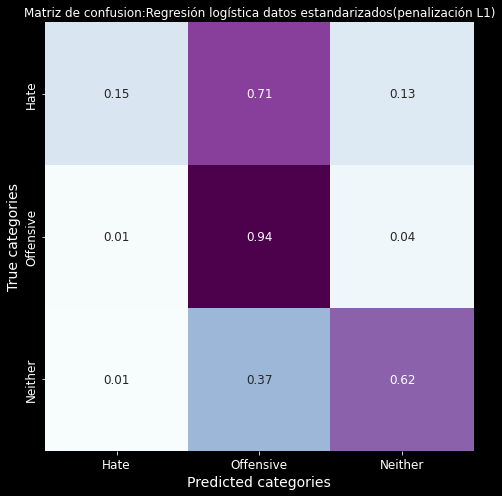

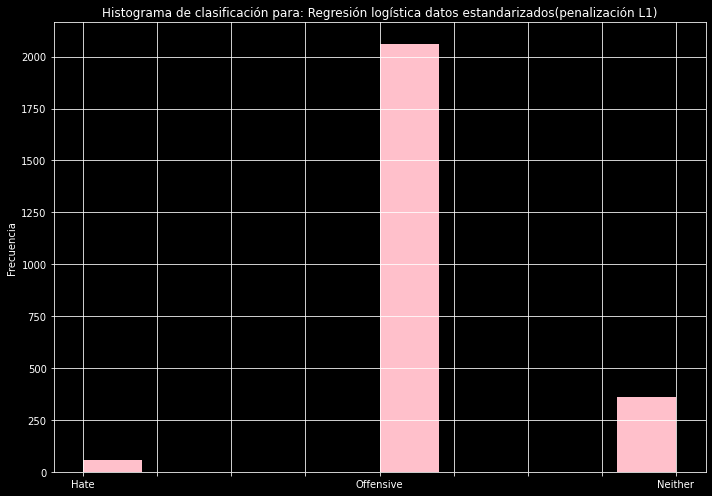

In [ ]:
graficas(report2_s, y_test, y_preds_3_s , 'Regresión logística datos estandarizados(penalización L1)', 'reglog_pena_l1s.png')

Accuracy:

In [ ]:
relog_pl1_s = accuracy_score(y_test, y_preds_3_s, normalize=True) #0.8350141185962081
print(relog_pl1_s)

0.8354175070592981


Penalización l2:

In [ ]:
logreg3 = LogisticRegression(solver='newton-cg', C=0.05, multi_class='multinomial',penalty='l2')
model3  = logreg3.fit(X_train, y_train)
y_preds_4 = model3.predict(X_test)
report3 = classification_report( y_test, y_preds_4 )

Graficas y Reporte

              precision    recall  f1-score   support

           0       0.28      0.21      0.24       164
           1       0.88      0.91      0.89      1905
           2       0.69      0.66      0.68       410

    accuracy                           0.82      2479
   macro avg       0.62      0.59      0.60      2479
weighted avg       0.81      0.82      0.81      2479



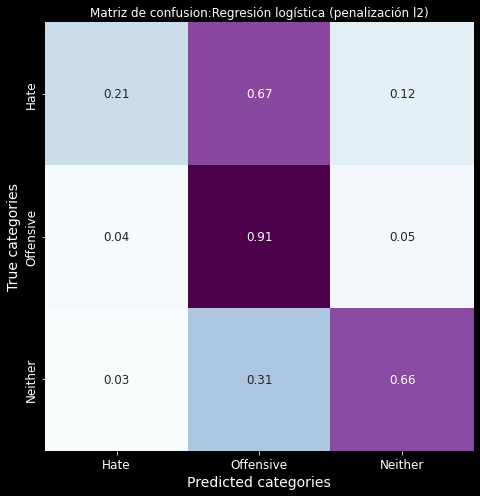

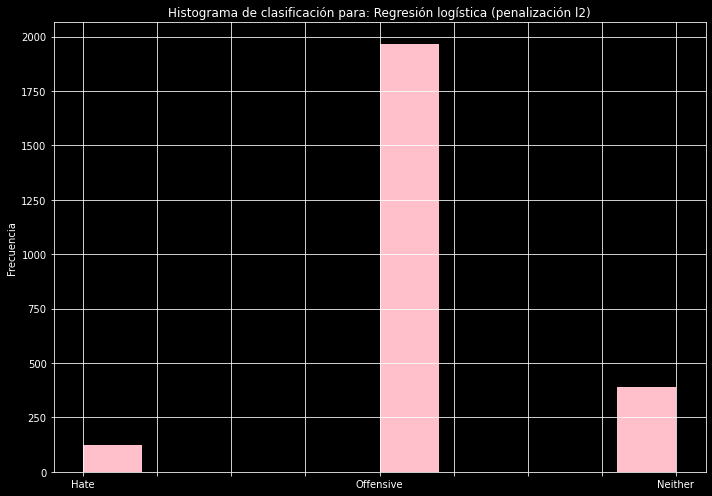

In [ ]:
graficas(report3, y_test, y_preds_4 , 'Regresión logística (penalización l2)', 'reglog_pena_l2.png')


Accuracy:

In [ ]:
relog_pl2 = accuracy_score(y_test, y_preds_4, normalize=True) #0.8204921339249698
print(relog_pl2)

0.8204921339249698


Regression Logistic with elastic net penalty:

In [ ]:
logreg4 = LogisticRegression(solver='saga', multi_class='multinomial',penalty='elasticnet',  l1_ratio=0.2)
model4  = logreg4.fit(X_train, y_train)
y_preds_5 = model4.predict(X_test)
report4 = classification_report( y_test, y_preds_5 )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Gráficas y Reporte

              precision    recall  f1-score   support

           0       0.38      0.21      0.27       164
           1       0.88      0.93      0.90      1905
           2       0.72      0.66      0.69       410

    accuracy                           0.84      2479
   macro avg       0.66      0.60      0.62      2479
weighted avg       0.82      0.84      0.83      2479



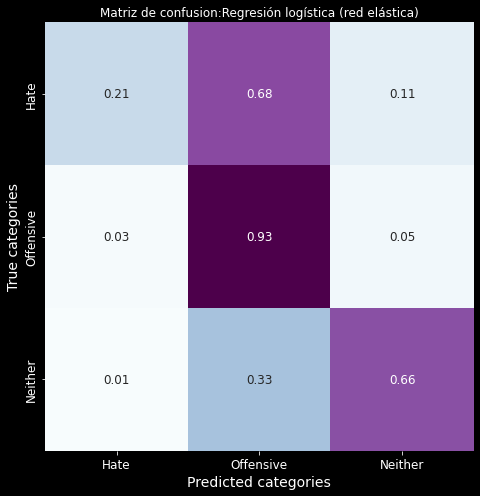

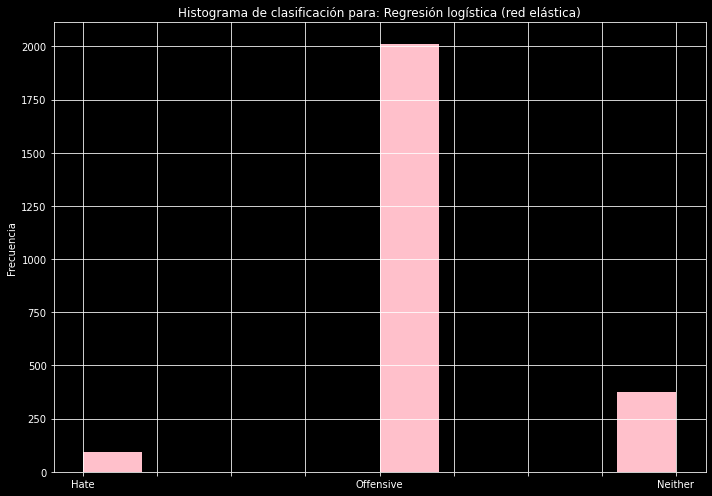

In [ ]:
graficas(report4, y_test, y_preds_5 , 'Regresión logística (red elástica)', 'reglog_en.png')

Accuracy:

In [ ]:
relog_pen = accuracy_score(y_test, y_preds_5, normalize=True) #0.835820895522388
print(relog_pen)

0.835820895522388


Regression Logistic with elastic net penalty with standarized data:

In [ ]:
logreg4_s = LogisticRegression(solver='saga', multi_class='multinomial',penalty='elasticnet',  l1_ratio=0.2)
model4_s  = logreg4_s.fit(X_train_s, y_train)
y_preds_5_s = model4_s.predict(X_test_s)
report4_s = classification_report( y_test, y_preds_5_s )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Grafica y reporte

              precision    recall  f1-score   support

           0       0.28      0.21      0.24       164
           1       0.88      0.91      0.89      1905
           2       0.69      0.66      0.68       410

    accuracy                           0.82      2479
   macro avg       0.62      0.59      0.60      2479
weighted avg       0.81      0.82      0.81      2479



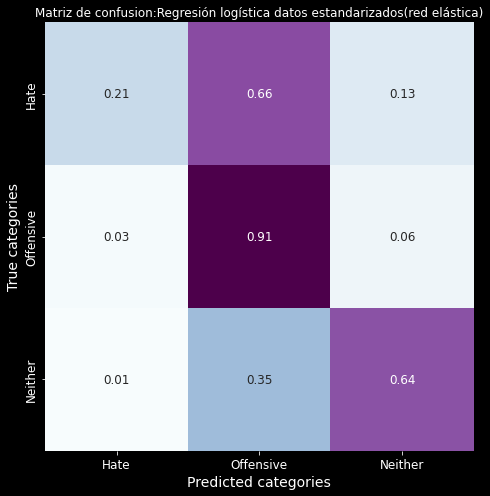

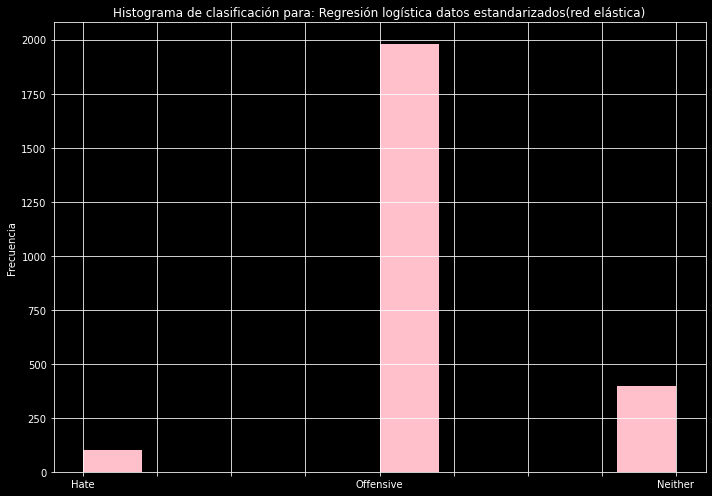

In [ ]:
graficas(report, y_test, y_preds_5_s, 'Regresión logística datos estandarizados(red elástica)', 'reglog_en_s.png')

Occuracy:

In [ ]:
relog_pen_s = accuracy_score(y_test, y_preds_5_s, normalize=True) #0.8172650262202501
print(relog_pen_s)

0.8168616377571601


**Support Vector Machine**:

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), LinearSVC(random_state=20, tol = 1e-5))

model5  = clf.fit(X_train, y_train)
y_preds_6 = model5.predict(X_test)
report5 = classification_report(y_test, y_preds_6)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Graficas y Reporte

              precision    recall  f1-score   support

           0       0.28      0.21      0.24       164
           1       0.88      0.91      0.89      1905
           2       0.69      0.66      0.68       410

    accuracy                           0.82      2479
   macro avg       0.62      0.59      0.60      2479
weighted avg       0.81      0.82      0.81      2479



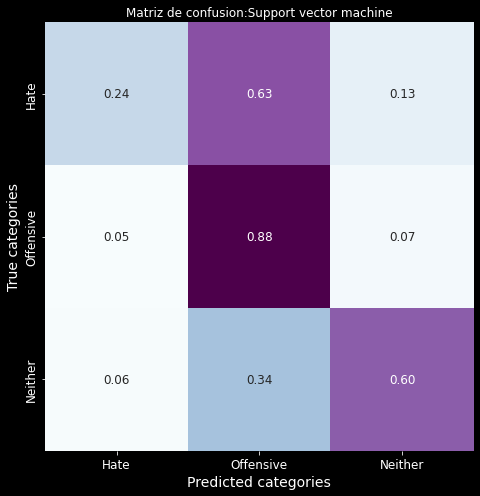

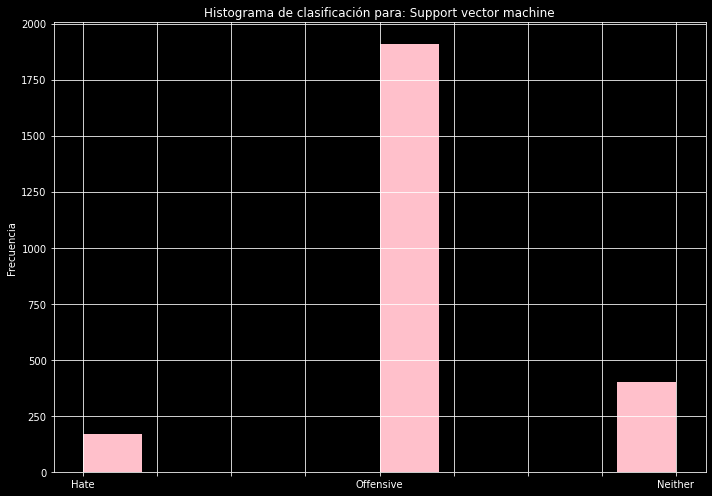

In [ ]:
graficas(report, y_test, y_preds_6, 'Support vector machine', 'svm.png')

Accuracy:

In [ ]:
svm_report = accuracy_score(y_test, y_preds_6, normalize=True) #0.7878176684146834
print(svm_report)

0.7878176684146834


**Multilayer Perceptron Classification:**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [ ]:
clf2 = MLPClassifier(random_state=1, max_iter=300)
model6  = clf2.fit(X_train, y_train)
y_preds_7 = model6.predict(X_test)
report6 = classification_report(y_test, y_preds_7)

Graficas y reporte

              precision    recall  f1-score   support

           0       0.28      0.21      0.24       164
           1       0.88      0.91      0.89      1905
           2       0.69      0.66      0.68       410

    accuracy                           0.82      2479
   macro avg       0.62      0.59      0.60      2479
weighted avg       0.81      0.82      0.81      2479



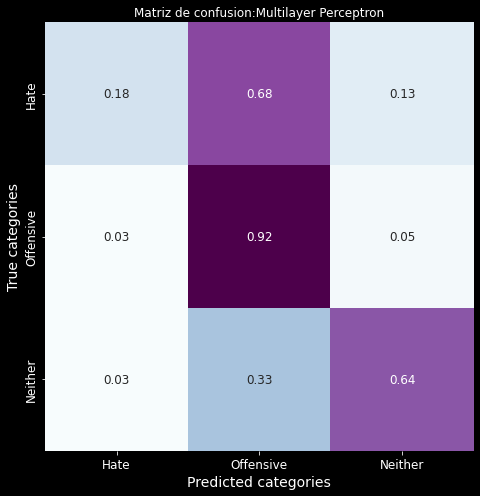

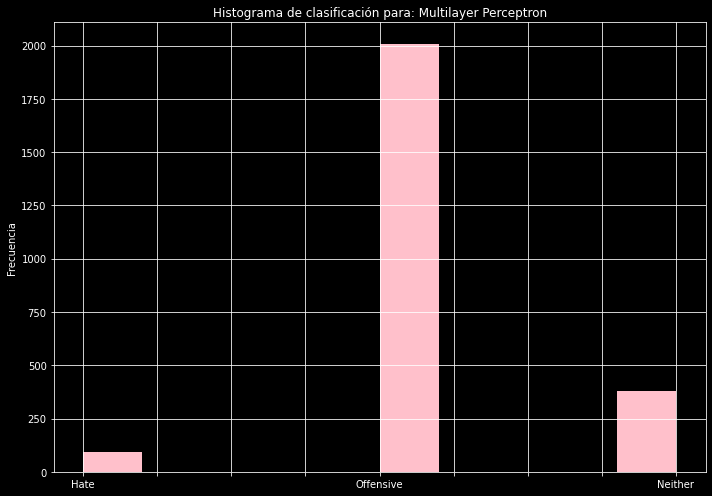

In [ ]:
graficas(report, y_test, y_preds_7 , 'Multilayer Perceptron', 'mlp.png')

In [ ]:
mlp_report = accuracy_score(y_test, y_preds_7, normalize=True) #0.8293666801129488
print(mlp_report)

0.8293666801129488


Comparando resultados:

In [ ]:
indx=list(X_test.index)

In [ ]:
def print_miss(idx,y_test,y_preds):
  n=len(idx)
  headings={0:'Hate Speech', 1:'Offensive Language', 2: 'Neither'}

  for i in range(n):
    if y_test[i] != y_preds[i]:
      print('tweet: %s' %tweets[idx[i]],'\n')
      aux1=y_test[i]
      print('True: %s' %aux1,'\n')
      aux2=y_preds[i]
      print('Pred: %s' %aux2,'\n')

**Grid Search**

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
pipe = Pipeline(
        [('select', 
          SelectFromModel(
             LogisticRegression(solver='saga', C=0.05, multi_class='multinomial',penalty='l1'))),
        ('model', LogisticRegression(solver='newton-cg', C=0.05, multi_class='multinomial'))])

grid_search = GridSearchCV(pipe, 
                           param_grid=[{}],
                           cv=5, 
                           verbose=2)

In [ ]:
model = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................................... total time= 4.2min


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................................... total time= 4.3min


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................................... total time= 4.3min


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................................... total time= 4.2min


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................................... total time= 4.3min


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


              precision    recall  f1-score   support

           0       0.40      0.23      0.29       164
           1       0.88      0.93      0.90      1905
           2       0.70      0.65      0.68       410

    accuracy                           0.84      2479
   macro avg       0.66      0.60      0.62      2479
weighted avg       0.82      0.84      0.83      2479



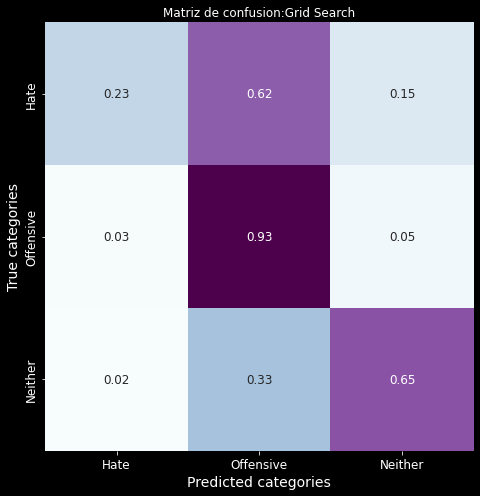

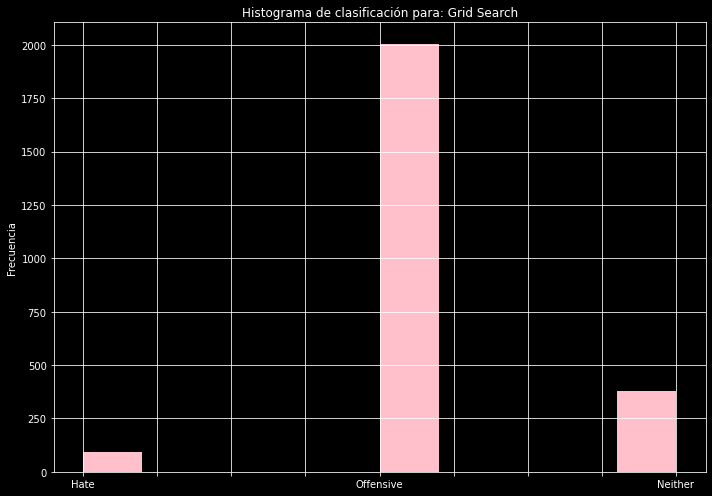

In [ ]:
preds=model.predict(X_test)
report_gs = classification_report( y_test, preds)
graficas(report_gs, y_test, preds , 'Grid Search', 'grid_search.png')

In [ ]:
gs_accuracy = accuracy_score(y_test, preds, normalize=True) #0.8346107301331182
print(gs_accuracy)

0.835820895522388


**Comparación:**

In [ ]:
print("\n**************************Decision Tress**************************\n")
print_miss(indx[:100],list(y_test),dtree_predictions)
print("\n**************************Logistic Regression**************************\n")
print("\n***********************Without Penalization**********************\n")
print_miss(indx[:100],list(y_test),y_preds_2)
print("\n***********************With L1 Penalization**********************\n")
print_miss(indx[:100],list(y_test),y_preds_3)
print("\n***********************With L1 Penalization**********************\n (Standarized data)\n")
print_miss(indx[:100],list(y_test),y_preds_3_s)
print("\n***********************With L2 Penalization**********************\n")
print_miss(indx[:100],list(y_test),y_preds_4)
print("\n***********************With Elastic Net Penalization**********************\n")
print_miss(indx[:100],list(y_test),y_preds_5)
print("\n***********************With Elastic Net Penalization**********************\n (Standarized data)\n")
print_miss(indx[:100],list(y_test),y_preds_5_s)
print("\n**************************Support Vector Machine**************************\n")
print_miss(indx[:100],list(y_test),y_preds_6)
print("\n**************************Multilayer Perceptron**************************\n")
print_miss(indx[:100],list(y_test),y_preds_7)
print("\n**************************Grid Seatch**************************\n")
print_miss(indx[:100],list(y_test),preds)


**************************Decision Tress**************************

tweet: RT @alex_mizz310: @Huntermoore why do you call most guys that talk shit to you "fags" then? You should use another word hypocrite. 

True: 2 

Pred: 0 

tweet: @MoenKiana fine walk bitch 

True: 0 

Pred: 1 

tweet: @JoePrich shut up faggot 

True: 0 

Pred: 2 

tweet: The only thing about niccas is they be followers smh .. Be ya self everyone else is taken!! 

True: 1 

Pred: 0 

tweet: I want my bitch to answer if my ex calling, with my dick in her mouth 

True: 2 

Pred: 1 

tweet: @mandaxll2963 yellow is even better 

True: 2 

Pred: 1 

tweet: I'll be a Yankee fan forever 

True: 2 

Pred: 1 

tweet: @_Saltlife13 Long story lol but I've missed you faggot 

True: 0 

Pred: 2 

tweet: RT @itsdavedude: cant just tell me anything bitch im one click away from google at all times 

True: 2 

Pred: 1 

tweet: These bitches boringgggg 

True: 2 

Pred: 1 

tweet: RT @Noworriezzzz: Don't lie to me bitch I'm giving 

Creando data frame de todos los metodos con TFID

In [ ]:
methods = ['Arboles de decision (Gini)', 'Arboles de decision (Entriopy)',
           'RL-Sin penalizacion','RL-Penalizacion L1', 'RL-Penalizacion L1 est', 
           'RL-Penalizacion L2', 'RL-Red elástica', 'RL-Red elástica est',
           'Support vector machine', 'Multilayer perceptron', 'Grid Search']

accuracy_vec = np.array([dtree1_accuracy, dtree2_accuracy,relog_sp,relog_pl1,
                         relog_pl1_s, relog_pl2, relog_pen, relog_pen_s,
                         svm_report, mlp_report, gs_accuracy])

preds_vec = np.array([dtree_predictions, dtree_predictions2,y_preds_2, y_preds_3,
                      y_preds_3_s, y_preds_4, y_preds_5, y_preds_5_s, y_preds_6,
                      y_preds_7, preds])
# headers for the .csv
df = pd.DataFrame(methods,columns=['Metodo'])
df['Accuracy'] = accuracy_vec
#df['Preds'] = preds_vec

# create .csv file
np.savetxt('predicciones_tfid.csv', preds_vec, delimiter=',')
df.to_csv('df_tfid.csv', encoding='utf-8')

Comparacion de todos los metodos con TFID

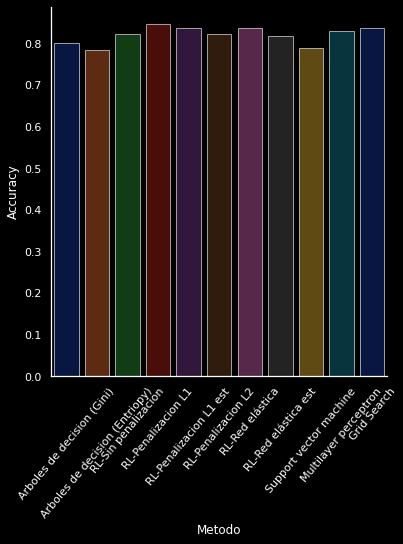

In [ ]:
import seaborn as sns
plt.style.available
plt.style.use('seaborn-dark-palette')
#plt.style.use("dark_background")
g = sns.catplot(
    data=df, kind="bar",
    x="Metodo", y="Accuracy",
    ci="sd", palette="dark", alpha=.6, height=6)
g.despine(right=True)
g.set_ylabels("Accuracy")
g.set_xticklabels(rotation=50)

Histogramas de clase

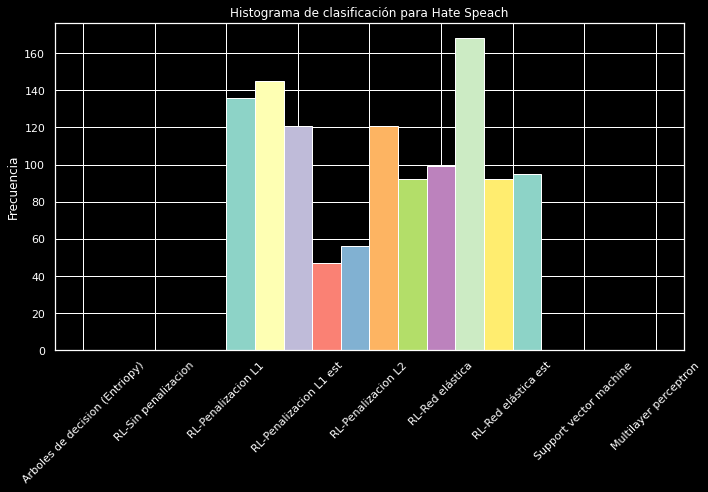

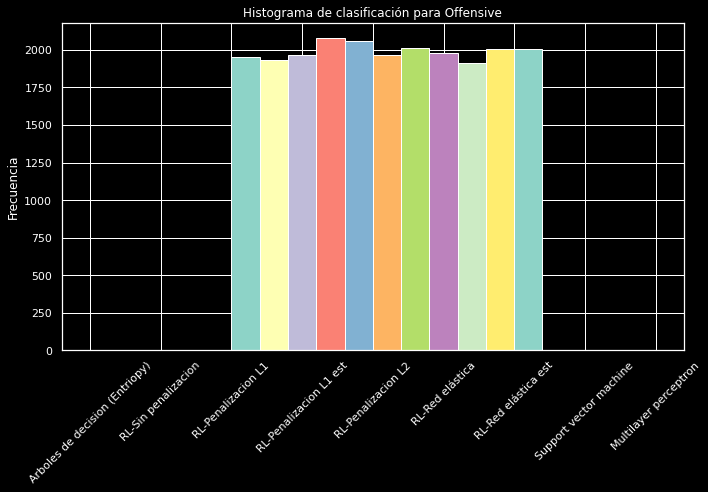

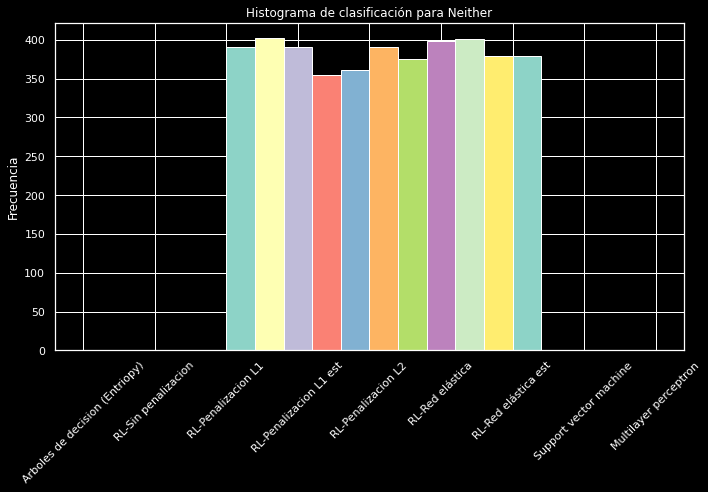

In [ ]:
def hist_speech(vecs, group, title):
  plt.style.available
  plt.style.use('dark_background')#'seaborn-dark-palette')
  fig, ax = plt.subplots(1, 1,
                          figsize =(10, 7),
                          tight_layout = True)
  n = len(vecs)
  space = 0.1
  for i in range(n):
    idx = np.where(vecs[i] == group)
    ax.hist(np.take(vecs[i], idx, axis=0)[0]+(i*space))#,color='pink')
  plt.title('Histograma de clasificación para '+title)
  ax.set_xticklabels(df['Metodo'], rotation = 45)
  ax.set_ylabel('Frecuencia')
  plt.grid()
  plt.savefig(title+'_hist.png')
  plt.show()

hist_speech(preds_vec, 0, 'Hate')
hist_speech(preds_vec, 1, 'Offensive')
hist_speech(preds_vec, 2, 'Neither')

# PARTE II 

DATA: TFID, POS & FEATS

Cargamos la respectiva matriz de datos:

In [9]:
N = pd.read_csv('Matriz2.txt', sep=" ", header=None)

In [12]:
x = pd.DataFrame(N)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, random_state=42, test_size=0.1)

Running Models:

Decision Trees: 

Gini criterion

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', random_state=100)
dtree_model = clf.fit(X_train2, y_train2)
dtree_predictions = dtree_model.predict(X_test2)
report = classification_report(y_test2, dtree_predictions)

Graficas, Reporte y Accuracy

              precision    recall  f1-score   support

           0       0.27      0.23      0.24       164
           1       0.88      0.89      0.88      1905
           2       0.62      0.64      0.63       410

    accuracy                           0.80      2479
   macro avg       0.59      0.58      0.58      2479
weighted avg       0.80      0.80      0.80      2479



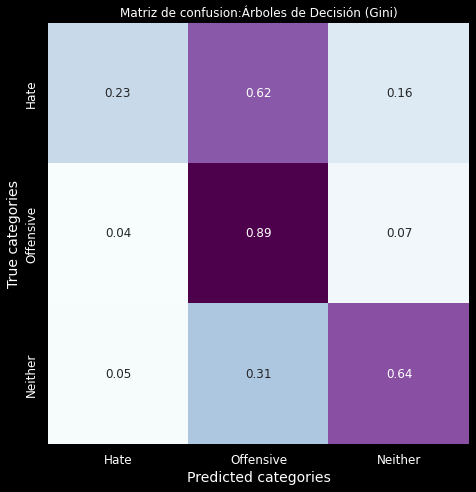

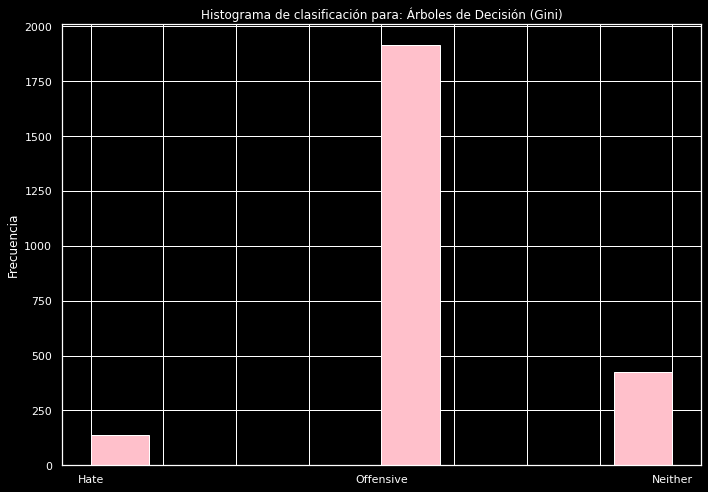

0.800726099233562


In [ ]:
graficas(report, y_test, dtree_predictions, 'Árboles de Decisión (Gini)', 'dtree_gini.png')
dtree1_accuracy = accuracy_score(y_test, dtree_predictions, normalize=True) # 0.800726099233562 
print(dtree1_accuracy)

Entropy criterion:

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=10)
dtree_model = clf.fit(X_train2, y_train2)
dtree_predictions2 = dtree_model.predict(X_test2)
report = classification_report(y_test2, dtree_predictions2)

Graficas, Reporte y Accuracy

              precision    recall  f1-score   support

           0       0.27      0.25      0.26       164
           1       0.87      0.88      0.87      1905
           2       0.59      0.58      0.58       410

    accuracy                           0.79      2479
   macro avg       0.58      0.57      0.57      2479
weighted avg       0.78      0.79      0.78      2479



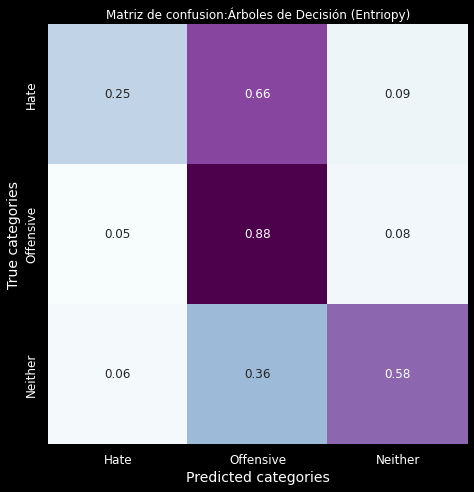

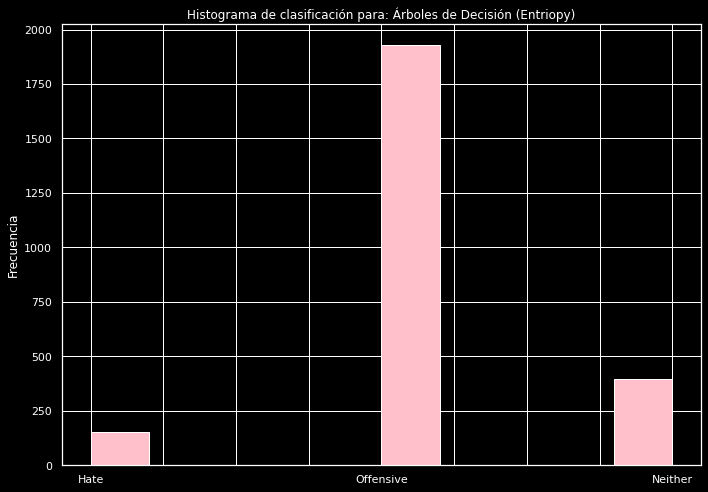

0.7858007260992336


In [ ]:
graficas(report, y_test, dtree_predictions2, 'Árboles de Decisión (Entriopy)', 'dtree_entriopy.png')
dtree2_accuracy = accuracy_score(y_test2, dtree_predictions2, normalize=True) # 0.7858007260992336
print(dtree2_accuracy) 

Regresión Logística: 

Sin penalización:

In [ ]:
logreg1 = LogisticRegression(solver='newton-cg', C=0.05, multi_class='multinomial')
model1 = logreg1.fit(X_train2, y_train2)
y_preds_2 = model1.predict(X_test2)
report = classification_report( y_test2, y_preds_2 )

Graficas, reportes y accuracy

              precision    recall  f1-score   support

           0       0.30      0.23      0.26       164
           1       0.88      0.91      0.90      1905
           2       0.72      0.68      0.70       410

    accuracy                           0.83      2479
   macro avg       0.63      0.61      0.62      2479
weighted avg       0.82      0.83      0.82      2479



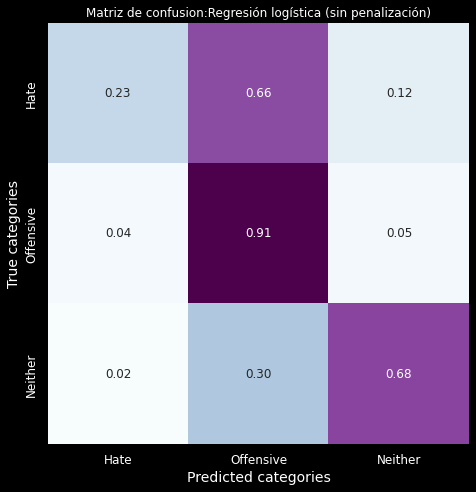

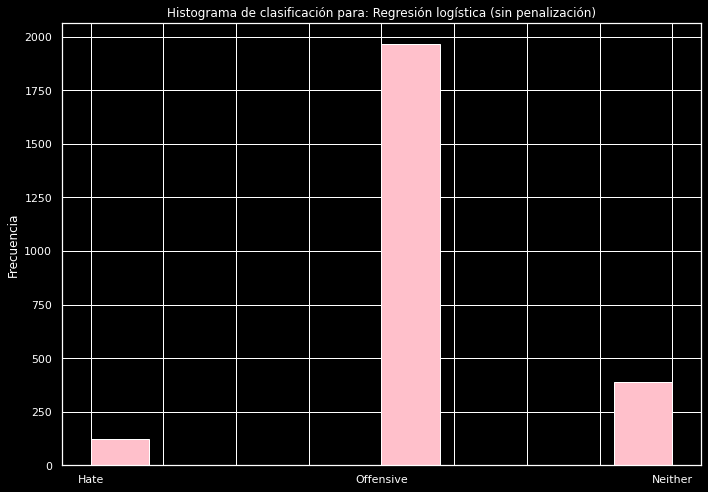


0.8281565147236789


In [ ]:
graficas(report, y_test2, y_preds_2, 'Regresión logística (sin penalización)', 'reglog_sinpena.png')
relog_sp = accuracy_score(y_test2, y_preds_2, normalize=True)
print('')
print(relog_sp) 

Con penalización l1:

In [ ]:
logreg2 = LogisticRegression(solver='saga', C=0.05, multi_class='multinomial',penalty='l1')
model2  = logreg2.fit(X_train2, y_train2)
y_preds_3 = model2.predict(X_test2)
report2 = classification_report( y_test2, y_preds_3 )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Graficas, reporte y accuracy


 Accuracy:
0.8394513916901977
              precision    recall  f1-score   support

           0       0.50      0.09      0.15       164
           1       0.85      0.97      0.91      1905
           2       0.79      0.54      0.64       410

    accuracy                           0.84      2479
   macro avg       0.71      0.53      0.56      2479
weighted avg       0.82      0.84      0.81      2479



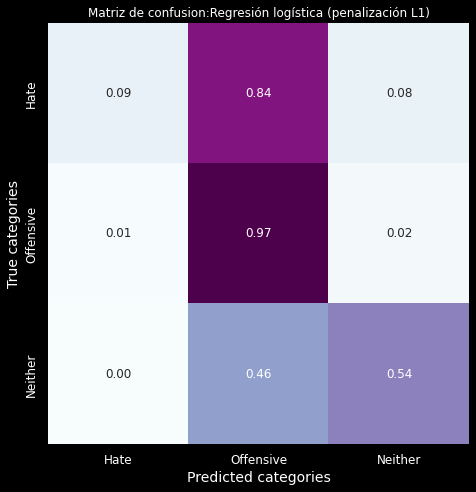

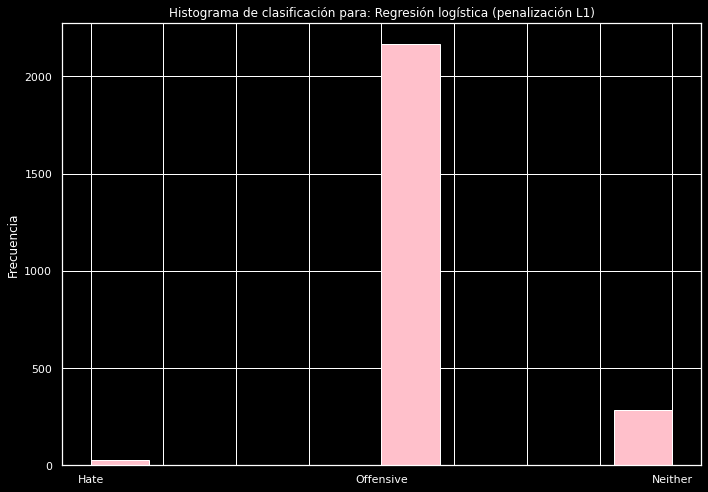

In [ ]:
print("\n Accuracy:")
relog_pl1 = accuracy_score(y_test2, y_preds_3, normalize=True) 
print(relog_pl1)
graficas(report2, y_test2, y_preds_3, 'Regresión logística (penalización L1)', 'reglog_pena_l1.png')

Penalización l1 con datos estandarizados:

In [ ]:
#Estandarizando datos
scaler = StandardScaler()
scaler.fit(X_train2)
X_train_s = scaler.transform(X_train2) 

scaler.fit(X_test2)
X_test_s = scaler.transform(X_test2) 
#Modelo Regresión logística con datos estandarizados 
logreg2_s = LogisticRegression(solver='saga', C=0.05, multi_class='multinomial',penalty='l1')
model2_s  = logreg2.fit(X_train_s, y_train2)
y_preds_3_s = model2_s.predict(X_test_s)
report2_s = classification_report( y_test2, y_preds_3_s )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Graficas, reporte y accuracy


 Accuracy:
0.8475191609519968
              precision    recall  f1-score   support

           0       0.39      0.15      0.21       164
           1       0.88      0.94      0.91      1905
           2       0.76      0.68      0.72       410

    accuracy                           0.85      2479
   macro avg       0.67      0.59      0.61      2479
weighted avg       0.83      0.85      0.83      2479



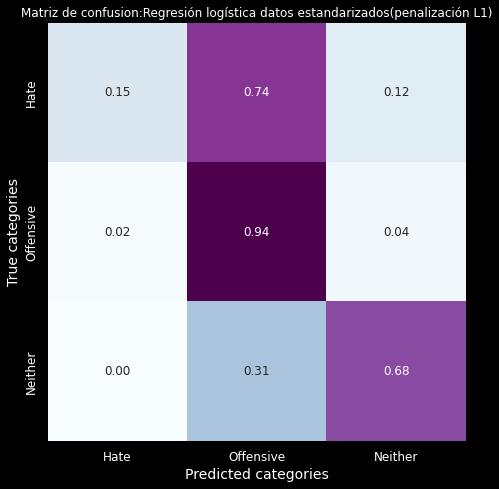

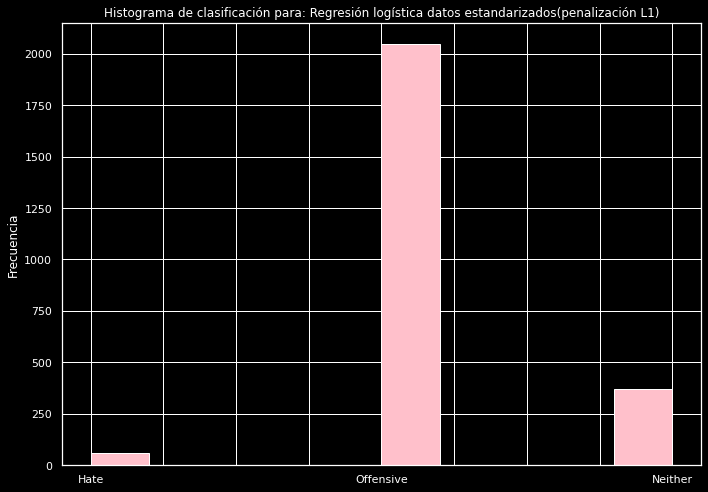

In [ ]:
print("\n Accuracy:")
relog_pl1_s = accuracy_score(y_test2, y_preds_3_s, normalize=True) # 0.8475191609519968
print(relog_pl1_s)
graficas(report2_s, y_test2, y_preds_3_s , 'Regresión logística datos estandarizados(penalización L1)', 'reglog_pena_l1s.png')

Penalización l2:

In [ ]:
logreg3 = LogisticRegression(solver='newton-cg', C=0.05, multi_class='multinomial',penalty='l2')
model3  = logreg3.fit(X_train2, y_train2)
y_preds_4 = model3.predict(X_test2)
report3 = classification_report( y_test2, y_preds_4 )

Grafica, reporte y accuracy


 Accuracy:
0.8281565147236789
              precision    recall  f1-score   support

           0       0.30      0.23      0.26       164
           1       0.88      0.91      0.90      1905
           2       0.72      0.68      0.70       410

    accuracy                           0.83      2479
   macro avg       0.63      0.61      0.62      2479
weighted avg       0.82      0.83      0.82      2479



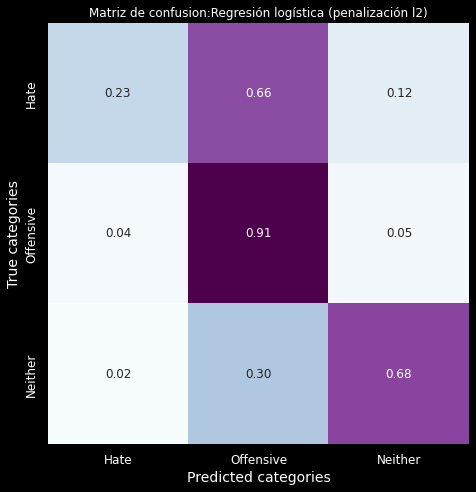

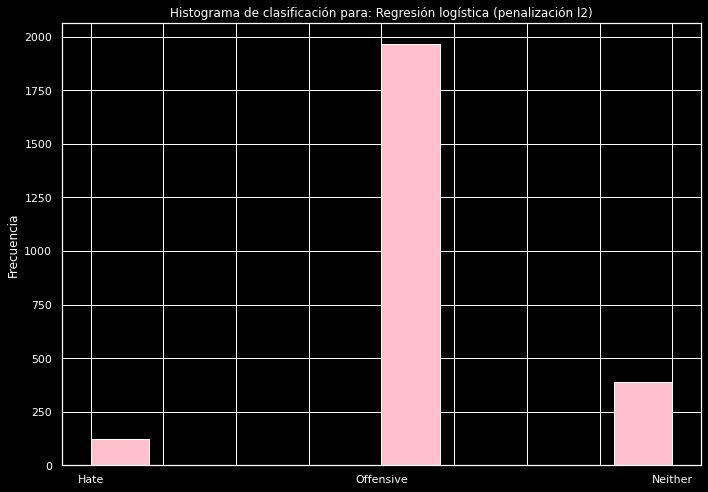

In [ ]:
print("\n Accuracy:")
relog_pl2 = accuracy_score(y_test2, y_preds_4, normalize=True)
print(relog_pl2)
graficas(report3, y_test2, y_preds_4 , 'Regresión logística (penalización l2)', 'reglog_pena_l2.png')

Elastic net penalty:

In [ ]:
logreg4 = LogisticRegression(solver='saga', multi_class='multinomial',penalty='elasticnet',  l1_ratio=0.2)
model4  = logreg4.fit(X_train2, y_train2)
y_preds_5 = model4.predict(X_test2)
report4 = classification_report( y_test2, y_preds_5 )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Grafica, reporte y accuracy


 Accuracy:
0.8442920532472771
              precision    recall  f1-score   support

           0       0.54      0.12      0.19       164
           1       0.86      0.97      0.91      1905
           2       0.79      0.56      0.66       410

    accuracy                           0.84      2479
   macro avg       0.73      0.55      0.59      2479
weighted avg       0.82      0.84      0.82      2479



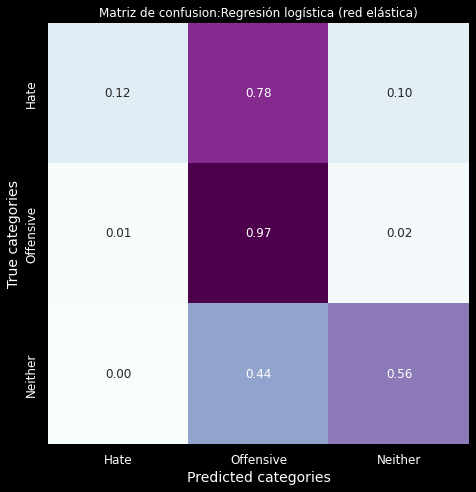

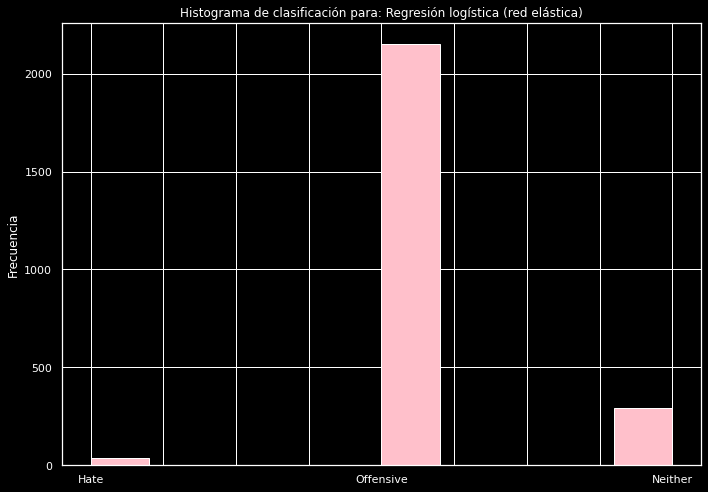

In [ ]:
print("\n Accuracy:")
relog_pen = accuracy_score(y_test2, y_preds_5, normalize=True) # 0.8442920532472771
print(relog_pen)
graficas(report4, y_test2, y_preds_5 , 'Regresión logística (red elástica)', 'reglog_en.png')

Elastic net penalty with standarized data:

In [ ]:
logreg4_s = LogisticRegression(solver='saga', multi_class='multinomial',penalty='elasticnet',  l1_ratio=0.2)
model4_s  = logreg4_s.fit(X_train_s, y_train2)
y_preds_5_s = model4_s.predict(X_test_s)
report4_s = classification_report( y_test2, y_preds_5_s )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Grafica, reporte y accuracy


 Occuracy:
0.8217022993142397
              precision    recall  f1-score   support

           0       0.36      0.21      0.26       164
           1       0.88      0.91      0.89      1905
           2       0.67      0.65      0.66       410

    accuracy                           0.82      2479
   macro avg       0.63      0.59      0.60      2479
weighted avg       0.81      0.82      0.81      2479



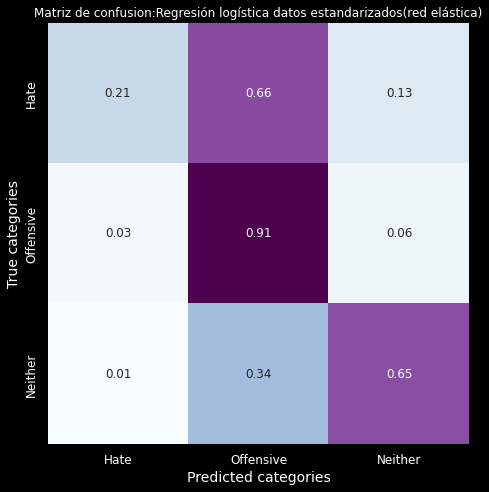

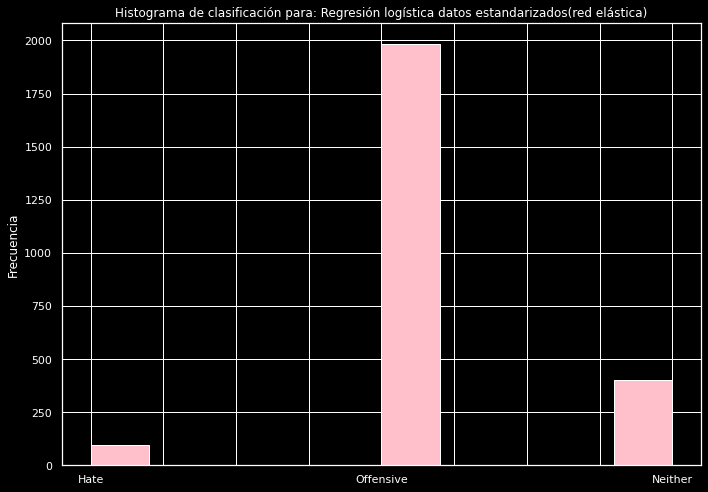

In [ ]:
print("\n Occuracy:")
relog_pen_s = accuracy_score(y_test2, y_preds_5_s, normalize=True)
print(relog_pen_s)
graficas(report4_s, y_test2, y_preds_5_s, 'Regresión logística datos estandarizados(red elástica)', 'reglog_en_s.png')

**Support Vector Machine:**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), LinearSVC(random_state=20, tol = 1e-5))

model5  = clf.fit(X_train2, y_train2)
y_preds_6 = model5.predict(X_test2)
report5 = classification_report(y_test2, y_preds_6)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Grafica, reporte y accuracy


 Accuracy:
0.7745058491327148
              precision    recall  f1-score   support

           0       0.17      0.21      0.19       164
           1       0.88      0.86      0.87      1905
           2       0.60      0.62      0.61       410

    accuracy                           0.77      2479
   macro avg       0.55      0.56      0.56      2479
weighted avg       0.79      0.77      0.78      2479



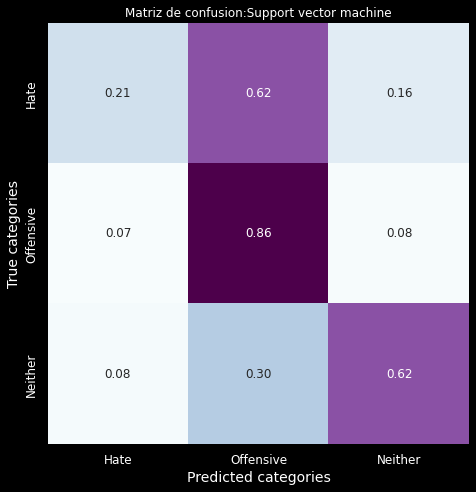

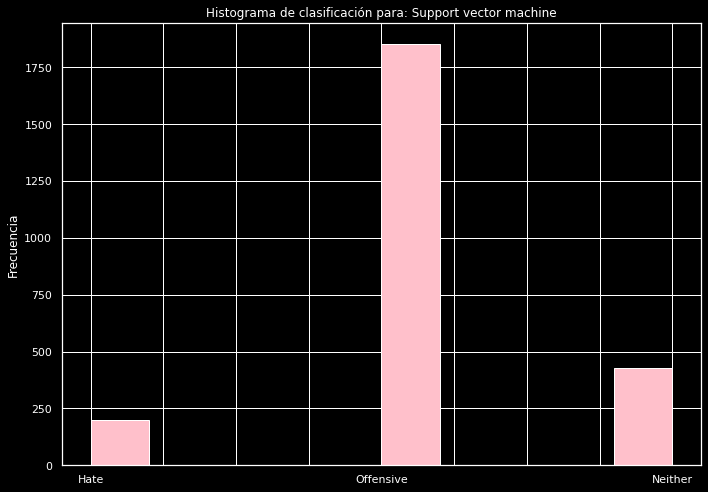

In [ ]:
print("\n Accuracy:")
svm_report = accuracy_score(y_test2, y_preds_6, normalize=True)
print(svm_report)
graficas(report5, y_test2, y_preds_6, 'Support vector machine', 'svm.png')

Multilayer Perceptron Classification:

In [ ]:
clf2 = MLPClassifier(random_state=1, max_iter=300)
model6  = clf2.fit(X_train2, y_train2)
y_preds_7 = model6.predict(X_test2)
report6 = classification_report(y_test2, y_preds_7)

Grafica, reporte y accuracy


 Accuracy:
0.8374344493747479
              precision    recall  f1-score   support

           0       0.31      0.10      0.16       164
           1       0.86      0.95      0.90      1905
           2       0.76      0.61      0.68       410

    accuracy                           0.84      2479
   macro avg       0.64      0.56      0.58      2479
weighted avg       0.81      0.84      0.82      2479



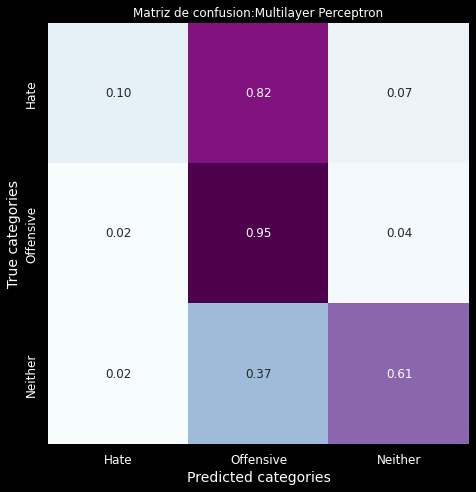

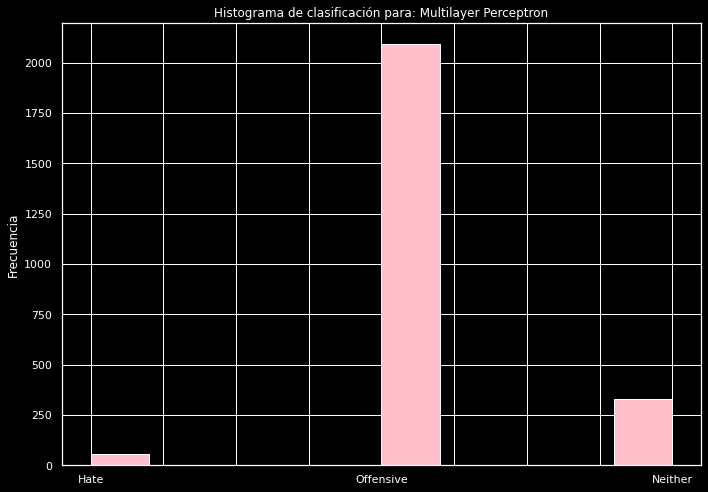

In [ ]:
print("\n Accuracy:")
mlp_report = accuracy_score(y_test2, y_preds_7, normalize=True)
print(mlp_report)
graficas(report6, y_test2, y_preds_7 , 'Multilayer Perceptron', 'mlp.png')

**Grid search:**

In [ ]:
pipe = Pipeline(
        [('select', 
          SelectFromModel(
             LogisticRegression(solver='saga', C=0.05, multi_class='multinomial',penalty='l1'))),
        ('model', LogisticRegression(solver='newton-cg', C=0.05, multi_class='multinomial'))])

grid_search = GridSearchCV(pipe, 
                           param_grid=[{}],
                           cv=5, 
                           verbose=2)
model  = grid_search.fit(X_train2, y_train2)
preds  = model.predict(X_test2)
report = classification_report( y_test2, preds )

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................................... total time= 9.3min


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................................... total time= 9.8min


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................................... total time=11.0min


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................................... total time= 9.7min


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................................... total time= 9.6min


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Graficas, reporte y accuracy


 Accuracy:
0.8374344493747479
              precision    recall  f1-score   support

           0       0.36      0.21      0.27       164
           1       0.88      0.93      0.90      1905
           2       0.73      0.67      0.70       410

    accuracy                           0.84      2479
   macro avg       0.66      0.60      0.62      2479
weighted avg       0.82      0.84      0.83      2479



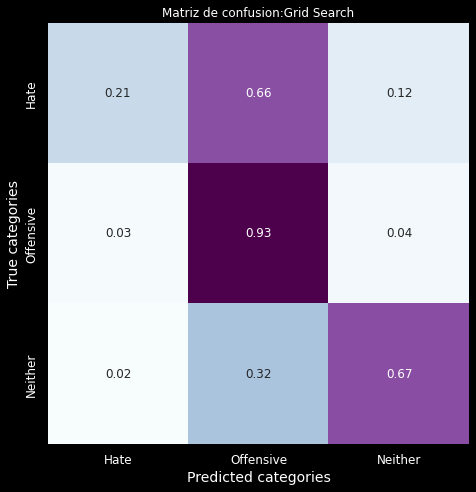

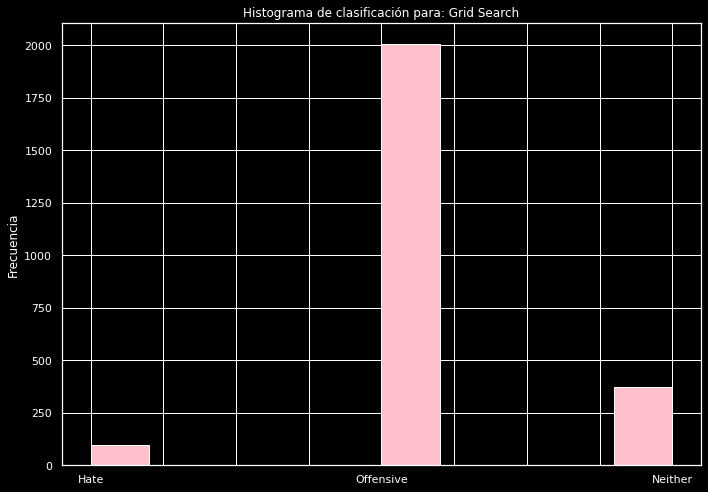

In [ ]:
print("\n Accuracy:")
gs_accuracy = accuracy_score(y_test2, preds, normalize=True)
print(gs_accuracy)
graficas(report, y_test2, preds , 'Grid Search', 'grid_search.png')

**Comparación:**

In [ ]:
index=list(X_test2.index)
print(len(index[:10]))

10


In [ ]:
print("\n**************************Decision Tress**************************\n")
print_miss(index[:100],list(y_test2),dtree_predictions)
print("\n**************************Logistic Regression**************************\n")
print("\n***********************Without Penalization**********************\n")
print_miss(index[:100],list(y_test2),y_preds_2)
print("\n***********************With L1 Penalization**********************\n")
print_miss(index[:100],list(y_test2),y_preds_3)
print("\n***********************With L1 Penalization**********************\n (Standarized data)\n")
print_miss(index[:100],list(y_test2),y_preds_3_s)
print("\n***********************With L2 Penalization**********************\n")
print_miss(index[:100],list(y_test2),y_preds_4)
print("\n***********************With Elastic Net Penalization**********************\n")
print_miss(index[:100],list(y_test2),y_preds_5)
print("\n***********************With Elastic Net Penalization**********************\n (Standarized data)\n")
print_miss(index[:100],list(y_test2),y_preds_5_s)
print("\n**************************Support Vector Machine**************************\n")
print_miss(index[:100],list(y_test2),y_preds_6)
print("\n**************************Multilayer Perceptron**************************\n")
print_miss(index[:100],list(y_test2),y_preds_7)
print("\n**************************Grid Seatch**************************\n")
print_miss(index[:100],list(y_test2),preds)


**************************Decision Tress**************************

tweet: RT @alex_mizz310: @Huntermoore why do you call most guys that talk shit to you "fags" then? You should use another word hypocrite. 

True: 2 

Pred: 1 

tweet: @MoenKiana fine walk bitch 

True: 0 

Pred: 2 

tweet: You know what fuck that bitch and you didnt react? girl it's me and you 

True: 1 

Pred: 0 

tweet: @JoePrich shut up faggot 

True: 0 

Pred: 2 

tweet: @SchulzGrayson @Dswizzle3 oh woulda coulda shoulda ass niggas bitch ass nigga, what u bout oh ban wagging ass nigga catch your phase 

True: 2 

Pred: 1 

tweet: @mandaxll2963 yellow is even better 

True: 2 

Pred: 1 

tweet: I'll be a Yankee fan forever 

True: 2 

Pred: 0 

tweet: @oVoshubham No the fuck am not bitch how bout u get out there bitch ass Nigga stupid ass 

True: 1 

Pred: 2 

tweet: &#8220;@A_Brown_30: Lmao Dylan just got called a pussy by Mr O himself @wagggggie&#8221; takes skill &#128527;&#128170; 

True: 2 

Pred: 0 

tweet: R

Crea y guarda Data Frame de los resultados

In [ ]:
methods = ['Arboles de decision (Gini)', 'Arboles de decision (Entriopy)',
           'RL-Sin penalizacion','RL-Penalizacion L1', 'RL-Penalizacion L1 est', 
           'RL-Penalizacion L2', 'RL-Red elástica', 'RL-Red elástica est',
           'Support vector machine', 'Multilayer perceptron', 'Grid Search']

accuracy_vec = np.array([dtree1_accuracy, dtree2_accuracy,relog_sp,relog_pl1,
                         relog_pl1_s, relog_pl2, relog_pen, relog_pen_s,
                         svm_report, mlp_report, gs_accuracy])

preds_vec = np.array([dtree_predictions, dtree_predictions2,y_preds_2, y_preds_3,
                      y_preds_3_s, y_preds_4, y_preds_5, y_preds_5_s, y_preds_6,
                      y_preds_7, preds])
# headers for the .csv
df = pd.DataFrame(methods,columns=['Metodo'])
df['Accuracy'] = accuracy_vec
#df['Preds'] = preds_vec

# create .csv file
np.savetxt('predicciones_tfid_pos_ot.csv', preds_vec, delimiter=',')
df.to_csv('df_tfid_pos_ot.csv', encoding='utf-8')



Accuracy  de todos los metodos para TFID+POS+Other features

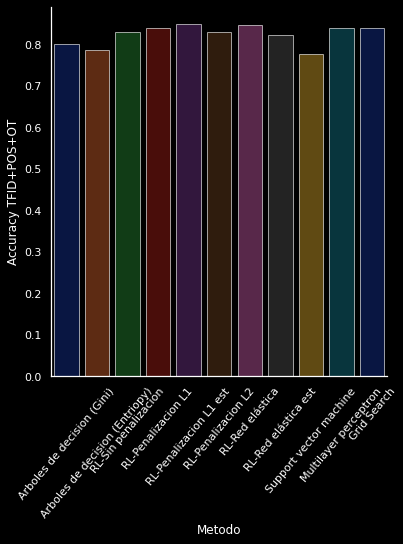

In [ ]:
import seaborn as sns
plt.style.available
plt.style.use('seaborn-dark-palette')
#plt.style.use("dark_background")
g = sns.catplot(
    data=df, kind="bar",
    x="Metodo", y="Accuracy",
    ci="sd", palette="dark", alpha=.6, height=6)
g.despine(right=True)
g.set_ylabels("Accuracy TFID+POS+OT")
g.set_xticklabels(rotation=50)
g.savefig("accuracy_tfid_pos_ot.png")

Histogramas de cada grupo con todos los metodos para TFID+POS+OT

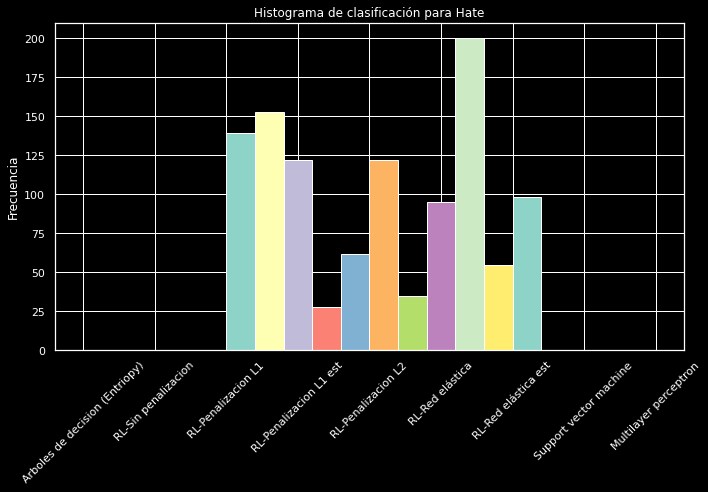

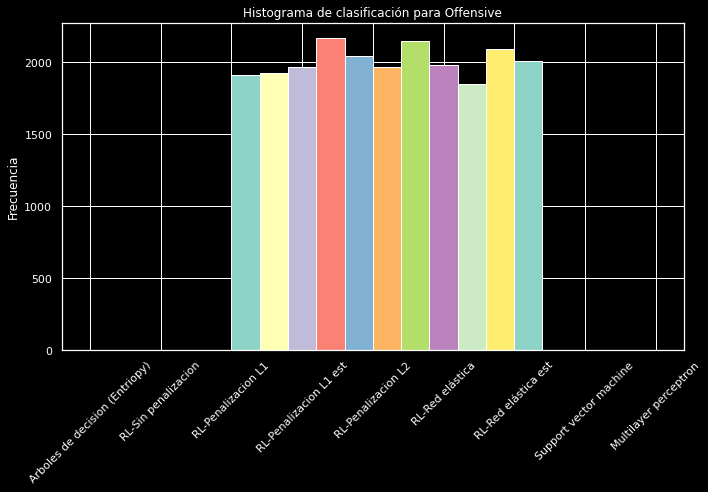

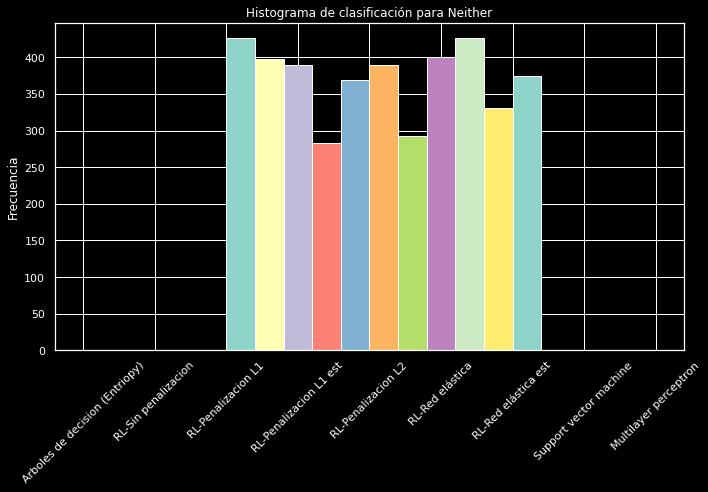

In [ ]:
def hist_speech(vecs, group, title):
  plt.style.available
  plt.style.use('dark_background')#'seaborn-dark-palette')
  fig, ax = plt.subplots(1, 1,
                          figsize =(10, 7),
                          tight_layout = True)
  n = len(vecs)
  space = 0.1
  for i in range(n):
    idx = np.where(vecs[i] == group)
    ax.hist(np.take(vecs[i], idx, axis=0)[0]+(i*space))#,color='pink')
  plt.title('Histograma de clasificación para '+title)
  ax.set_xticklabels(df['Metodo'], rotation = 45)
  ax.set_ylabel('Frecuencia')
  plt.grid()
  plt.savefig(title+'_hist.png')
  plt.show()

hist_speech(preds_vec, 0, 'Hate')
hist_speech(preds_vec, 1, 'Offensive')
hist_speech(preds_vec, 2, 'Neither')


**Tokenizer by words:**

In [ ]:
vectorizer = TfidfVectorizer(
    tokenizer=word_tokenize,
    preprocessor=preprocess,
    ngram_range=(1, 3),
    stop_words=stopwords,
    use_idf=True,
    smooth_idf=False,
    norm=None,
    decode_error='replace',
    max_features=10000,
    min_df=5,
    max_df=0.75
    )
vectorizer.fit_transform(tweets).toarray()
vectorizer.get_feature_names()
#Construct tfidf matrix and get relevant scores
tfidf2 = vectorizer.fit_transform(tweets).toarray()
vocab = {v:i for i, v in enumerate(vectorizer.get_feature_names())} #Por qué en triadas?
idf_vals = vectorizer.idf_ #Inverse Data Frequency (Peso de palabras (raras))
idf_dict = {i:idf_vals[i] for i in vocab.values()} #keys are indices; values are IDF scores

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['#', "'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
vectorizer.get_feature_names()

['!',
 '! !',
 '! ! !',
 '! ! #',
 '! ! &',
 "! ! ''",
 '! ! :',
 '! ! ?',
 '! ! I',
 '! ! Lol',
 '! ! You',
 '! ! ``',
 '! #',
 '! # 8221',
 '! # 8230',
 '! &',
 '! & #',
 "! ''",
 "! '' #",
 "! '' &",
 '! --',
 '! ...',
 '! :',
 '! : )',
 '! ?',
 '! ? !',
 '! All',
 '! And',
 '! But',
 '! Do',
 "! Do n't",
 '! DoG',
 '! Fuck',
 '! Get',
 '! Haha',
 '! He',
 '! I',
 "! I 'm",
 "! I n't",
 '! If',
 '! It',
 "! It 's",
 '! Just',
 '! Lmao',
 '! Lol',
 '! My',
 '! No',
 '! She',
 '! So',
 '! That',
 '! The',
 '! This',
 '! We',
 '! What',
 '! You',
 "! You 're",
 '! ``',
 '! `` :',
 '! http',
 '#',
 '# #',
 '# &',
 '# & #',
 '# 1',
 '# 10071',
 '# 10071 ;',
 '# 10084',
 '# 10084 ;',
 '# 1041185',
 '# 1041185 ;',
 '# 1041191',
 '# 1041191 ;',
 '# 1041196',
 '# 1041196 ;',
 '# 1041204',
 '# 1041204 ;',
 '# 1041219',
 '# 1041219 ;',
 '# 1043323',
 '# 1043323 ;',
 '# 1043358',
 '# 1043358 ;',
 '# 1043359',
 '# 1043359 ;',
 '# 127797',
 '# 127797 ;',
 '# 127811',
 '# 127811 ;',
 '# 127814',
 

In [ ]:
#Get POS tags for tweets and save as a string
tweet_tags2 = []
for t in tweets:
    tokens = word_tokenize(preprocess(t))
    tags = nltk.pos_tag(tokens) #Parts of a speech (clasifica en tipo de palabra)
    tag_list = [x[1] for x in tags]
    tag_str = " ".join(tag_list)
    tweet_tags2.append(tag_str)
#We can use the TFIDF vectorizer to get a token matrix for the POS tags
pos_vectorizer = TfidfVectorizer(
    tokenizer=None,
    lowercase=False,
    preprocessor=None,
    ngram_range=(1, 3),
    stop_words=None,
    use_idf=False,
    smooth_idf=False,
    norm=None,
    decode_error='replace',
    max_features=5000,
    min_df=5,
    max_df=0.75,
    )
#Construct POS TF matrix and get vocab dict
pos2 = pos_vectorizer.fit_transform(pd.Series(tweet_tags2)).toarray()
pos_vocab = { v:i for i, v in enumerate(pos_vectorizer.get_feature_names()) }

In [ ]:
M_words = np.concatenate([tfidf2,pos2,feats],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#np.savetxt( "Matriz_words.txt", M_words)
X_words = pd.DataFrame(M_words)
X_train, X_test, y_train, y_test = train_test_split(X_words, y, random_state=42, test_size=0.1)

**Modelos:**


Decission Tress: Gini criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', random_state=100)
dtree_model = clf.fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
report = classification_report(y_test, dtree_predictions)

Grafica, reporte y accuracy


 accuracy:
0.8543767648245261
              precision    recall  f1-score   support

           0       0.34      0.24      0.28       164
           1       0.91      0.92      0.92      1905
           2       0.74      0.78      0.76       410

    accuracy                           0.85      2479
   macro avg       0.66      0.65      0.65      2479
weighted avg       0.84      0.85      0.85      2479



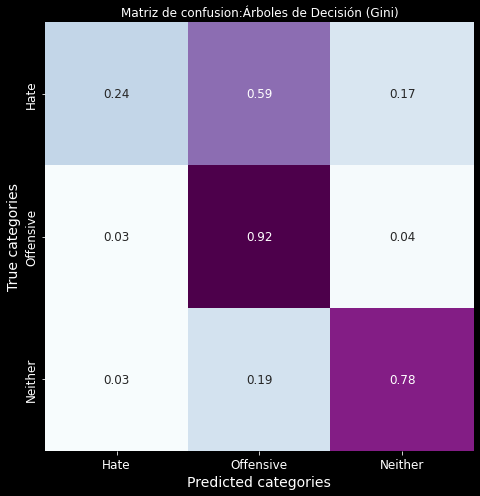

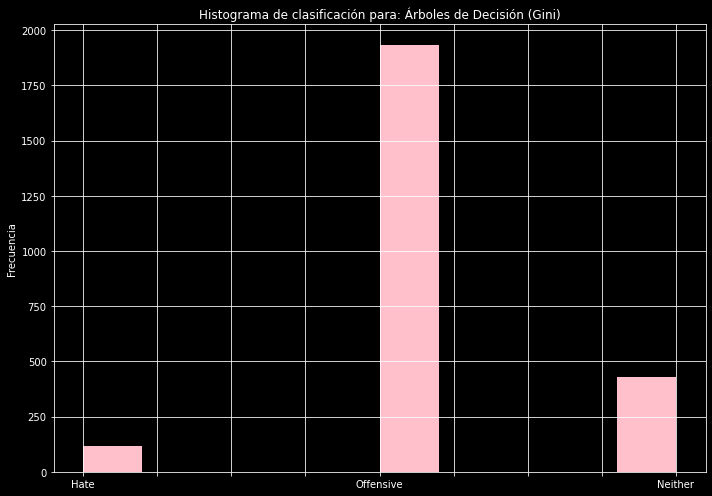

In [ ]:
print("\n accuracy:")
dtree1_accuracy = accuracy_score(y_test, dtree_predictions, normalize=True)#0.7991125453812021
print(dtree1_accuracy)
graficas(report, y_test, dtree_predictions, 'Árboles de Decisión (Gini)', 'dtree_gini.png')


Entropy criteria:

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=10)
dtree_model = clf.fit(X_train, y_train)
dtree_predictions2 = dtree_model.predict(X_test)
report = classification_report(y_test, dtree_predictions2)

Grafica, reporte y accuracy


 Accuracy:
0.8539733763614361
              precision    recall  f1-score   support

           0       0.31      0.24      0.27       164
           1       0.91      0.92      0.92      1905
           2       0.75      0.80      0.77       410

    accuracy                           0.85      2479
   macro avg       0.66      0.65      0.65      2479
weighted avg       0.85      0.85      0.85      2479



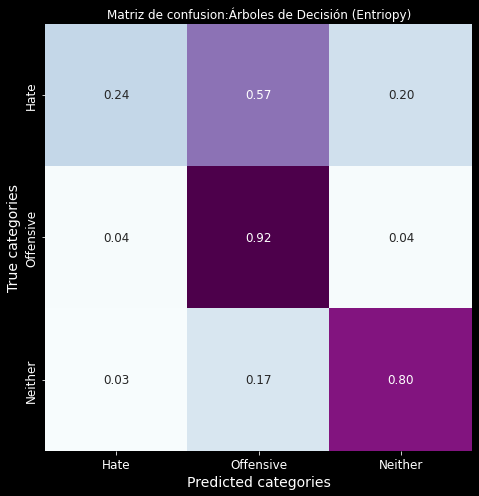

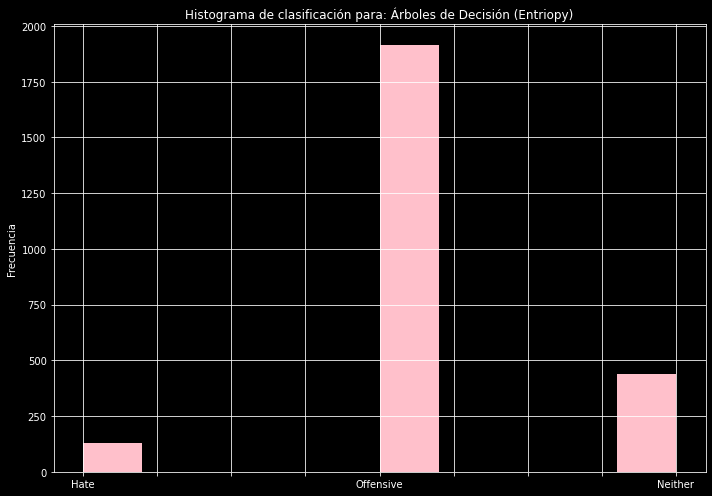

In [ ]:
print("\n Accuracy:")
dtree2_accuracy = accuracy_score(y_test, dtree_predictions2, normalize=True) #0.7833803953206938
print(dtree2_accuracy) 
graficas(report, y_test, dtree_predictions2, 'Árboles de Decisión (Entriopy)', 'dtree_entriopy.png')

In [ ]:
#
methods = ['Arboles de decision (Gini)', 'Arboles de decision (Entriopy)']

accuracy_vec = np.array([dtree1_accuracy, dtree2_accuracy])

preds_vec = np.array([dtree_predictions, dtree_predictions2])
# headers for the .csv
df = pd.DataFrame(methods,columns=['Metodo'])
df['Accuracy'] = accuracy_vec
#df['Preds'] = preds_vec

# create .csv file
np.savetxt('predicciones_word_tree.csv', preds_vec, delimiter=',')
df.to_csv('df_words_tree.csv', encoding='utf-8')


Regresión Logística:

Sin penalización:

In [ ]:
logreg1 = LogisticRegression(solver='newton-cg', C=0.05, multi_class='multinomial')
model1 = logreg1.fit(X_train, y_train)
y_preds_2 = model1.predict(X_test)
report = classification_report( y_test, y_preds_2 )

Grafica, reporte y accuracy

              precision    recall  f1-score   support

           0       0.40      0.24      0.30       164
           1       0.91      0.94      0.93      1905
           2       0.84      0.84      0.84       410

    accuracy                           0.88      2479
   macro avg       0.72      0.68      0.69      2479
weighted avg       0.87      0.88      0.87      2479



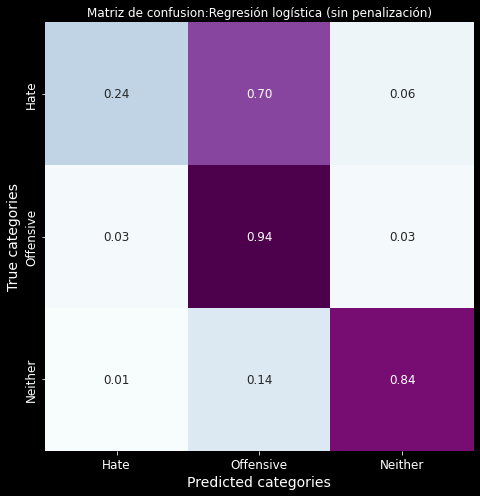

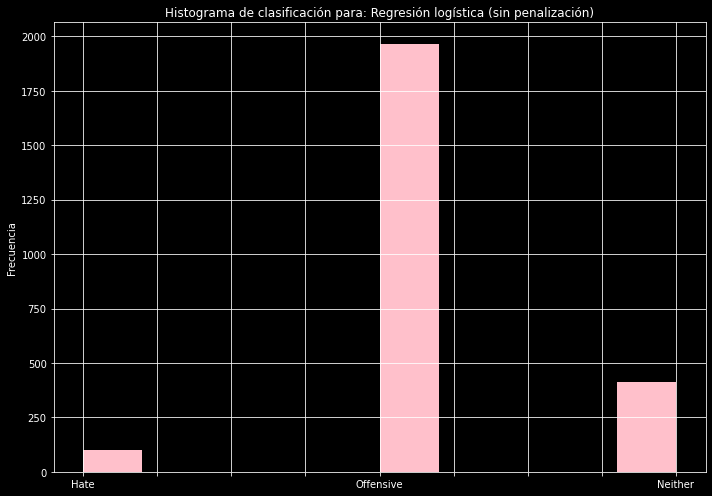


 Accuracy:

0.8789834610730133


In [ ]:
graficas(report, y_test, y_preds_2, 'Regresión logística (sin penalización)', 'reglog_sinpena.png')
relog_sp = accuracy_score(y_test, y_preds_2, normalize=True) 
print("\n Accuracy:")
print('')
print(relog_sp) 
#
methods = ['RL-Sin penalizacion']
accuracy_vec = np.array([relog_sp])
preds_vec = np.array([y_preds_2])
# headers for the .csv
df = pd.DataFrame(methods,columns=['Metodo'])
df['Accuracy'] = accuracy_vec
#df['Preds'] = preds_vec
# create .csv file
np.savetxt('predicciones_words_rg_sp.csv', preds_vec, delimiter=',')
df.to_csv('df_words_rg_sp.csv', encoding='utf-8')


Con penalización L1:

In [ ]:
logreg2 = LogisticRegression(solver='saga', C=0.05, multi_class='multinomial',penalty='l1')
model2  = logreg2.fit(X_train, y_train)
y_preds_3 = model2.predict(X_test)
report2 = classification_report( y_test, y_preds_3 )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Grafica, reporte y accuracy


 Accuracy:
0.8075837031060912
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       164
           1       0.81      0.98      0.89      1905
           2       0.77      0.31      0.44       410

    accuracy                           0.81      2479
   macro avg       0.53      0.43      0.44      2479
weighted avg       0.75      0.81      0.76      2479



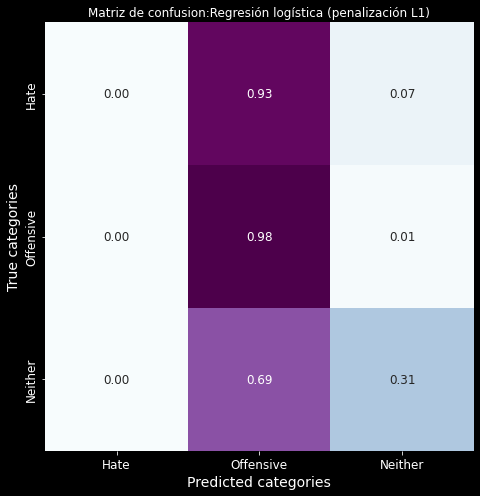

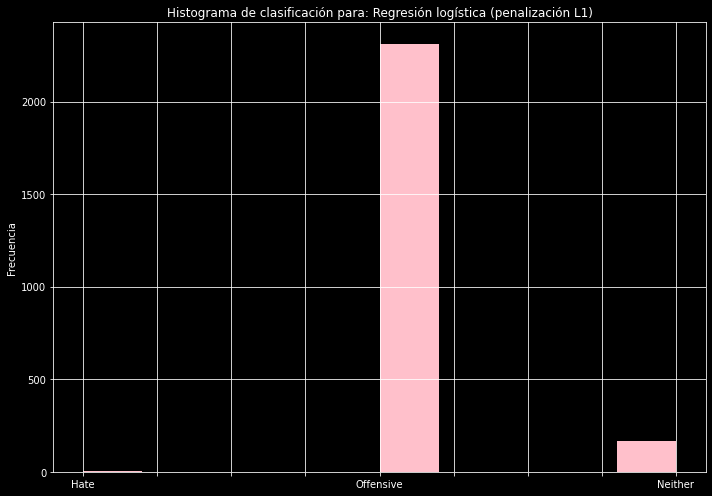

In [ ]:
print("\n Accuracy:")
relog_pl1 = accuracy_score(y_test, y_preds_3, normalize=True) #0.844695441710367
print(relog_pl1)
graficas(report2, y_test, y_preds_3, 'Regresión logística (penalización L1)', 'reglog_pena_l1.png')
#
methods = ['RL-Penalizacion L1']
accuracy_vec = np.array([relog_pl1])
preds_vec = np.array([y_preds_3])
# headers for the .csv
df = pd.DataFrame(methods,columns=['Metodo'])
df['Accuracy'] = accuracy_vec
#df['Preds'] = preds_vec
# create .csv file
np.savetxt('predicciones_words_rg_pl1.csv', preds_vec, delimiter=',')
df.to_csv('df_words_rg_pl1.csv', encoding='utf-8')


Con penalización L2:

In [ ]:
logreg3 = LogisticRegression(solver='newton-cg', C=0.05, multi_class='multinomial',penalty='l2')
model3  = logreg3.fit(X_train, y_train)
y_preds_4 = model3.predict(X_test)
report3 = classification_report( y_test, y_preds_4 )

Grafica, Reporte y accuracy


 Accuracy:
0.8789834610730133
              precision    recall  f1-score   support

           0       0.40      0.24      0.30       164
           1       0.91      0.94      0.93      1905
           2       0.84      0.84      0.84       410

    accuracy                           0.88      2479
   macro avg       0.72      0.68      0.69      2479
weighted avg       0.87      0.88      0.87      2479



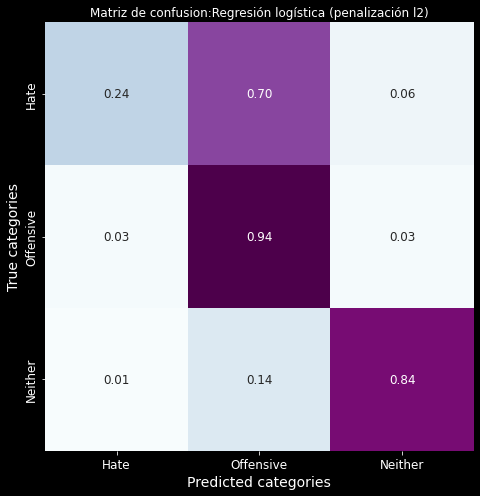

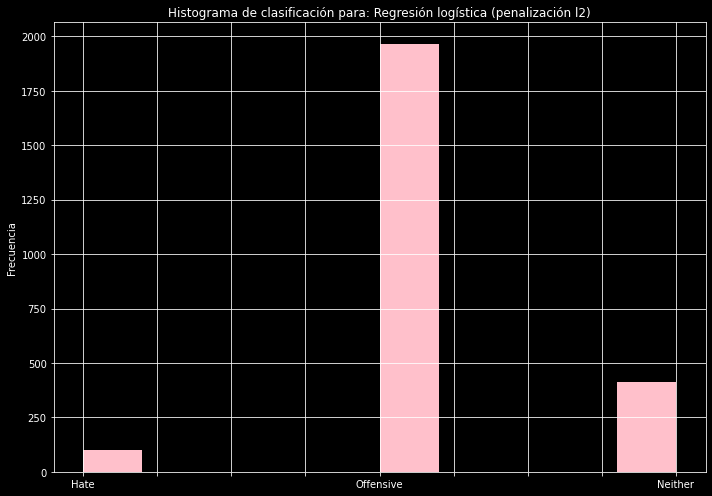

In [ ]:
print("\n Accuracy:")
relog_pl2 = accuracy_score(y_test, y_preds_4, normalize=True)
print(relog_pl2)
graficas(report3, y_test, y_preds_4 , 'Regresión logística (penalización l2)', 'reglog_pena_l2.png')
#
methods = ['RL-Penalizacion L2']
accuracy_vec = np.array([relog_pl2])
preds_vec = np.array([y_preds_4])
# headers for the .csv
df = pd.DataFrame(methods,columns=['Metodo'])
df['Accuracy'] = accuracy_vec
#df['Preds'] = preds_vec
# create .csv file
np.savetxt('predicciones_words_rg_pl2.csv', preds_vec, delimiter=',')
df.to_csv('df_words_rg_pl2.csv', encoding='utf-8')


Elastic net penalization:

In [ ]:
logreg4 = LogisticRegression(solver='saga', multi_class='multinomial',penalty='elasticnet',  l1_ratio=0.2)
model4  = logreg4.fit(X_train, y_train)
y_preds_5 = model4.predict(X_test)
report4 = classification_report( y_test, y_preds_5 )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Grafica, reporte y accuracy


 Accuracy:
0.809197256958451
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       164
           1       0.81      0.98      0.89      1905
           2       0.77      0.32      0.45       410

    accuracy                           0.81      2479
   macro avg       0.53      0.43      0.45      2479
weighted avg       0.75      0.81      0.76      2479



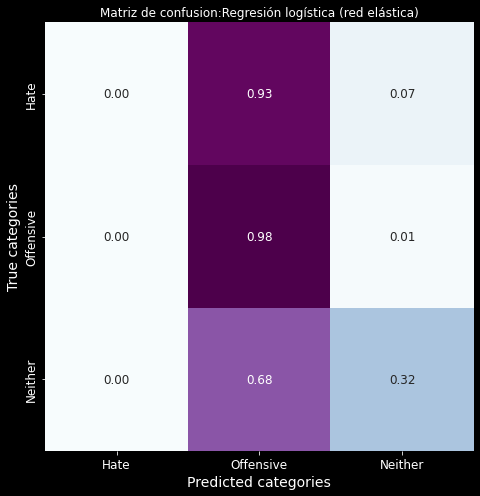

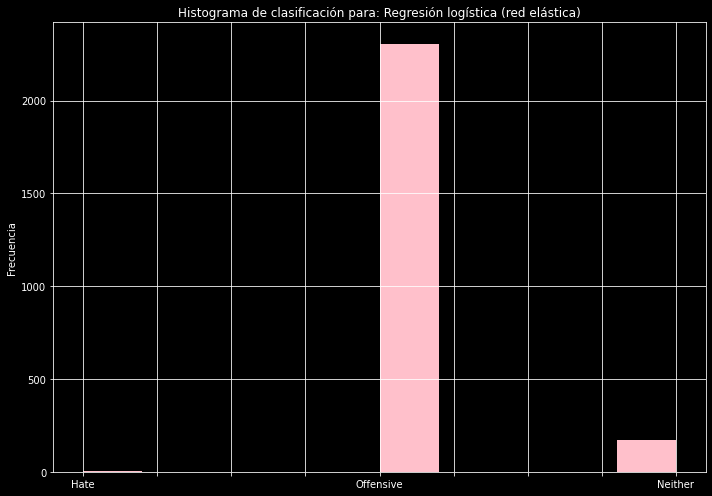

In [ ]:
print("\n Accuracy:")
relog_pen = accuracy_score(y_test, y_preds_5, normalize=True) #0.835820895522388
print(relog_pen)
graficas(report4, y_test, y_preds_5 , 'Regresión logística (red elástica)', 'reglog_en.png')

#
methods = ['Arboles de decision (Gini)', 'Arboles de decision (Entriopy)',
           'RL-Sin penalizacion','RL-Penalizacion L1', 'RL-Penalizacion L2', 
           'RL-Red elástica']

accuracy_vec = np.array([dtree1_accuracy, dtree2_accuracy,relog_sp,relog_pl1,
                         relog_pl2, relog_pen])

preds_vec = np.array([dtree_predictions, dtree_predictions2,y_preds_2,
                      y_preds_3, y_preds_4, y_preds_5])
# headers for the .csv
df = pd.DataFrame(methods,columns=['Metodo'])
df['Accuracy'] = accuracy_vec
#df['Preds'] = preds_vec

# create .csv file
np.savetxt('predicciones_words.csv', preds_vec, delimiter=',')
df.to_csv('df_words.csv', encoding='utf-8')


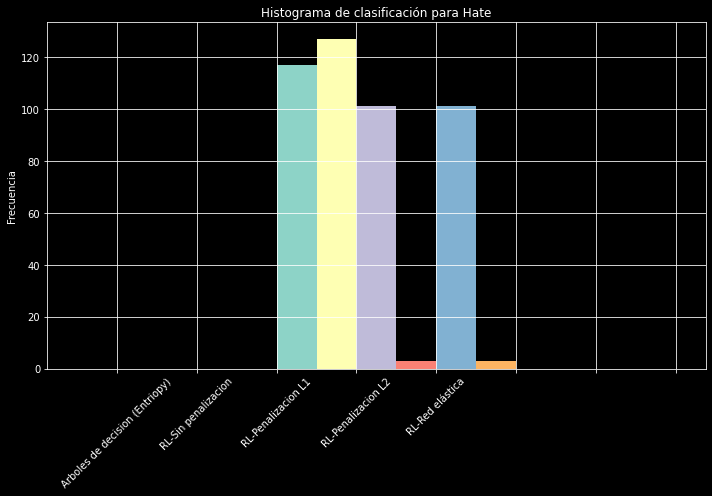

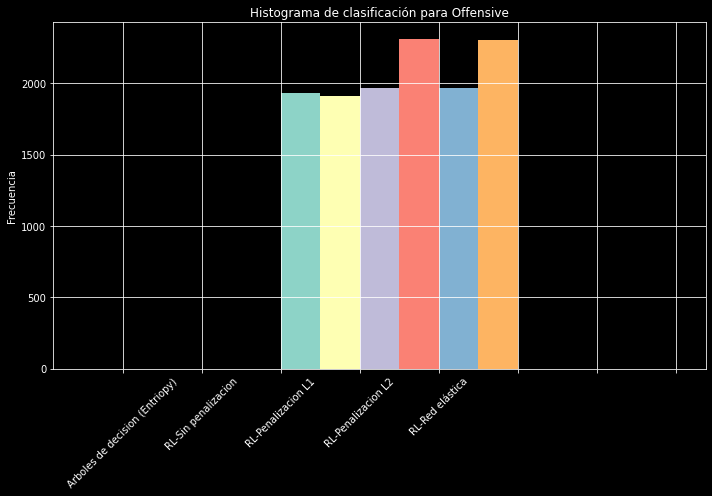

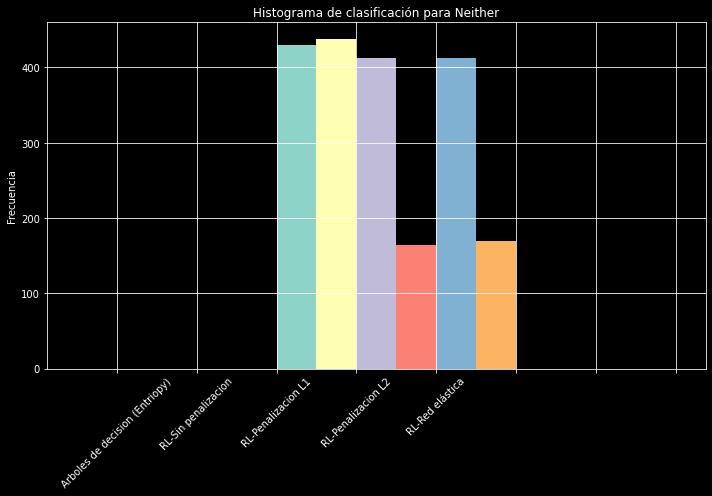

In [ ]:
#
def hist_speech(vecs, group, title):
  plt.style.available
  plt.style.use('dark_background')#'seaborn-dark-palette')
  fig, ax = plt.subplots(1, 1,
                          figsize =(10, 7),
                          tight_layout = True)
  n = len(vecs)
  space = 0.1
  for i in range(n):
    idx = np.where(vecs[i] == group)
    ax.hist(np.take(vecs[i], idx, axis=0)[0]+(i*space))#,color='pink')
  plt.title('Histograma de clasificación para '+title)
  ax.set_xticklabels(df['Metodo'], rotation = 45)
  ax.set_ylabel('Frecuencia')
  plt.grid()
  plt.savefig(title+'_hist_words.png')
  plt.show()

hist_speech(preds_vec, 0, 'Hate')
hist_speech(preds_vec, 1, 'Offensive')
hist_speech(preds_vec, 2, 'Neither')



**SVM:**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), LinearSVC(random_state=20, tol = 1e-5))

model5  = clf.fit(X_train, y_train)
y_preds_6 = model5.predict(X_test)
report5 = classification_report(y_test, y_preds_6)

Graficas, reporte y accuracy

In [ ]:
print("\n Accuracy:")
svm_report = accuracy_score(y_test, y_preds_6, normalize=True)
print(svm_report)
graficas(report5, y_test, y_preds_6, 'Support vector machine', 'svm.png')

MLP:

In [ ]:
clf2 = MLPClassifier(random_state=1, max_iter=300)
model6  = clf2.fit(X_train, y_train)
y_preds_7 = model6.predict(X_test)
report6 = classification_report(y_test, y_preds_7)

Grafica, reporte y accuracy

In [ ]:
print("\n Accuracy:")
mlp_report = accuracy_score(y_test, y_preds_7, normalize=True)
print(mlp_report)
graficas(report6, y_test2, y_preds_7 , 'Multilayer Perceptron', 'mlp.png')

**Grid Search:**

In [ ]:
pipe = Pipeline(
        [('select', 
          SelectFromModel(
             LogisticRegression(solver='saga', C=0.05, multi_class='multinomial',penalty='l1'))),
        ('model', LogisticRegression(solver='newton-cg', C=0.05, multi_class='multinomial'))])

grid_search = GridSearchCV(pipe, 
                           param_grid=[{}],
                           cv=5, 
                           verbose=2)
model  = grid_search.fit(X_train, y_train)
preds  = model.predict(X_test)
report = classification_report( y_test, preds )

Grafica, reporte y accuracy

In [ ]:
print("\n Accuracy:")
gs_accuracy = accuracy_score(y_test, preds, normalize=True)
print(gs_accuracy)
graficas(report, y_test, preds , 'Grid Search', 'grid_search.png')

Comparación:

In [ ]:
index=list(X_test.index)
print("\n**************************Decision Tress**************************\n")
print_miss(index[:100],list(y_test),dtree_predictions)
print("\n**************************Logistic Regression**************************\n")
print("\n***********************Without Penalization**********************\n")
print_miss(index[:100],list(y_test),y_preds_2)
print("\n***********************With L1 Penalization**********************\n")
print_miss(index[:100],list(y_test),y_preds_3)
print("\n***********************With L2 Penalization**********************\n")
print_miss(index[:100],list(y_test),y_preds_4)
print("\n***********************With Elastic Net Penalization**********************\n")
print_miss(index[:100],list(y_test),y_preds_5)
print("\n**************************Support Vector Machine**************************\n")
print_miss(index[:100],list(y_test),y_preds_6)
print("\n**************************Multilayer Perceptron**************************\n")
print_miss(index[:100],list(y_test),y_preds_7)
print("\n**************************Grid Seatch**************************\n")
print_miss(index[:100],list(y_test),preds)


In [ ]:
methods = ['Arboles de decision (Gini)', 'Arboles de decision (Entriopy)',
           'RL-Sin penalizacion','RL-Penalizacion L1',  
           'RL-Penalizacion L2', 'RL-Red elástica',
           'Support vector machine', 'Multilayer perceptron']

accuracy_vec = np.array([dtree1_accuracy, dtree2_accuracy,relog_sp,relog_pl1,
                         relog_pl2, relog_pen,
                         svm_report, mlp_report])

preds_vec = np.array([dtree_predictions, dtree_predictions2,y_preds_2, y_preds_3,
                      y_preds_4, y_preds_5, y_preds_6,
                      y_preds_7])
# headers for the .csv
df = pd.DataFrame(methods,columns=['Metodo'])
df['Accuracy'] = accuracy_vec
#df['Preds'] = preds_vec

# create .csv file
np.savetxt('predicciones_tfid.csv', preds_vec, delimiter=',')
df.to_csv('df_tfid.csv', encoding='utf-8')

#
import seaborn as sns
plt.style.available
plt.style.use('seaborn-dark-palette')
#plt.style.use("dark_background")
g = sns.catplot(
    data=df, kind="bar",
    x="Metodo", y="Accuracy",
    ci="sd", palette="dark", alpha=.6, height=6)
g.despine(right=True)
g.set_ylabels("Accuracy")
g.set_xticklabels(rotation=50)

#
def hist_speech(vecs, group, title):
  plt.style.available
  plt.style.use('dark_background')#'seaborn-dark-palette')
  fig, ax = plt.subplots(1, 1,
                          figsize =(10, 7),
                          tight_layout = True)
  n = len(vecs)
  space = 0.1
  for i in range(n):
    idx = np.where(vecs[i] == group)
    ax.hist(np.take(vecs[i], idx, axis=0)[0]+(i*space))#,color='pink')
  plt.title('Histograma de clasificación para '+title)
  ax.set_xticklabels(df['Metodo'], rotation = 45)
  ax.set_ylabel('Frecuencia')
  plt.grid()
  plt.savefig(title+'_hist.png')
  plt.show()

hist_speech(preds_vec, 0, 'Hate')
hist_speech(preds_vec, 1, 'Offensive')
hist_speech(preds_vec, 2, 'Neither')